<a href="https://colab.research.google.com/github/lhc0104/liverpool_KoBERT/blob/main/Lee%2C_Hocheol_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductory Note


This dissertation presents an original research study conducted as part of the MSc programme in Data Science and Artificial Intelligence at the University of Liverpool. It explores the application of a Korean-language optimised sentiment classification model, KoBERT, to evaluate and classify the emotional expressions of patients who have undergone cardiovascular and cerebrovascular surgeries. The research aims to contribute toward evidence-based, personalised postoperative care strategies by integrating emotion analysis within the framework of the Transitional Care Model (TCM).

All findings and analyses herein are derived from anonymised, publicly available data and are presented in accordance with ethical research standards.






---
**Title : SENTIMENT ANALYSIS OF CARDIOVASCULAR AND CEREBROVASCULAR DISEASES PATIENTS USING THE KOBERT MODELING**

---




Submitted to

The University of Liverpool


MASTER OF SCIENCE





2025/June/30

Lee, Hocheol



# Part A (non-modeling)

##  0.Intro

In [ ]:
# Font Update & Install
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,307 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
# install konlpy
!pip install konlpy

In [ ]:
# Import
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from nltk.probability import FreqDist
from matplotlib import font_manager, rc
from collections import Counter

from wordcloud import WordCloud
import matplotlib.font_manager as fm

from tqdm import tqdm
import time
import pickle

import seaborn as sns

In [ ]:
# Font Path Set
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [ ]:
# Google Drive Mount (Path set)
drive.mount("/content/drive")

Mounted at /content/drive


## 1.Word Cloud & Frequency

In [ ]:
from google.cloud import translate_v2

In [ ]:
# Stop Word File Path set
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file]
    return stopwords

stop_words = load_stopwords('/content/drive/MyDrive/Colab Notebooks/senti/wc/stopword.txt')

In [ ]:
# Function for Word Cloud & Frequency Extraction
okt = Okt()
stop_words_set = set(stop_words)

def process_content(content):
    return [word[0] for word in okt.pos(content, stem=True) if word[1] in ['Noun', 'Verb', 'Adjective'] and 1 < len(word[0]) <= 10 and word[0] not in stop_words_set]

In [ ]:

# Path to the authentication key file
credentials_path = "/content/drive/MyDrive/Colab Notebooks/senti/API_key/swift-catfish-417406-ca88262124ae.json"

In [ ]:
# Function to save word frequency data as a pickle file

def save_word_freq_to_pickle(combined_text, output_file_path):
    word_freq = Counter()
    with tqdm(total=len(combined_text), desc="ing(진행 중)") as pbar:
        for content in combined_text:
            tokens = process_content(content)
            word_freq.update(tokens)
            pbar.update(1)

    with open(output_file_path, 'wb') as file:
        pickle.dump(word_freq, file)

    print(f"to SAVE . file name: {output_file_path}")

In [ ]:
# Translation function
def translate_text(text, target_language='en', credentials_path=None):
    translate_client = translate_v2.Client.from_service_account_json(credentials_path)
    result = translate_client.translate(text, target_language=target_language)
    return result['translatedText']

In [ ]:
def save_translated_words_to_pickle(translated_words, output_file_path):
    with open(output_file_path, 'wb') as file:
        pickle.dump(translated_words, file)
    print(f"to SAVE . file name: {output_file_path}")

In [ ]:
# to Load the saved file

def load_translated_words_from_pickle(input_file_path):
    with open(input_file_path, 'rb') as file:
        translated_words = pickle.load(file)
    return translated_words

### 1.1 Frequency check

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/wc/final_result_sa3.csv')

# Split the data frame into cases where the BorH column value is 0 and cases where it is 1
df_B = df[df['BorH'] == 0]  # BorH 열 값이 0인 경우
df_H = df[df['BorH'] == 1]  # BorH 열 값이 1인 경우

# Process each dataframe to create a "combined_text" column
combined_text = df.iloc[:, 13:].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
combined_text_B = df_B.iloc[:, 13:].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
combined_text_H = df_H.iloc[:, 13:].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [ ]:
# Save word frequency data to a pickle file
save_word_freq_to_pickle(combined_text, '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_all.pkl')
save_word_freq_to_pickle(combined_text_B, '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_brain.pkl')
save_word_freq_to_pickle(combined_text_H, '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_heart.pkl')

### 1.2 Both ver

Counter({'수술': 11501, '병원': 6744, '받다': 5005, '검사': 4892, '없다': 4531, '보다': 4309, '환자': 4065, '입원': 3883, '치료': 3620, '자다': 3099, '먹다': 3065, '가다': 2848, '좋다': 2840, '오다': 2756, '들다': 2682, '정도': 2583, '퇴원': 2452, '후기': 2390, '아니다': 2289, '생각': 2250, '아프다': 2215, '증상': 2166, '경우': 2002, '시술': 1986, '엄마': 1953, '많다': 1893, '이송': 1869, '나오다': 1858, '해주다': 1793, '혈관': 1763, '그렇다': 1739, '뇌혈관': 1692, '진료': 1610, '선생님': 1607, '상태': 1528, '교수': 1455, '다시': 1445, '운동': 1443, '머리': 1431, '재활': 1423, '크다': 1385, '모야': 1362, '사람': 1332, '간호사': 1321, '정말': 1313, '통증': 1307, '주다': 1273, '구급차': 1261, '진행': 1251, '싶다': 1248, '알다': 1244, '계속': 1243, '병실': 1217, '질환': 1183, '들어가다': 1171, '확인': 1169, '나다': 1165, '결과': 1156, '의사': 1142, '심장': 1115, '맞다': 1109, '마취': 1100, '방법': 1086, '부위': 1025, '찍다': 1022, '보호자': 1012, '의료': 998, '가능하다': 995, '모르다': 988, '시작': 979, '건강': 962, '뇌동맥류': 958, '뇌출혈': 955, '드리다': 939, '눕다': 926, '처음': 921, '걱정': 908, '느낌': 907, '수면': 906, '심하다': 904, '발생': 893, '회복': 889, '문

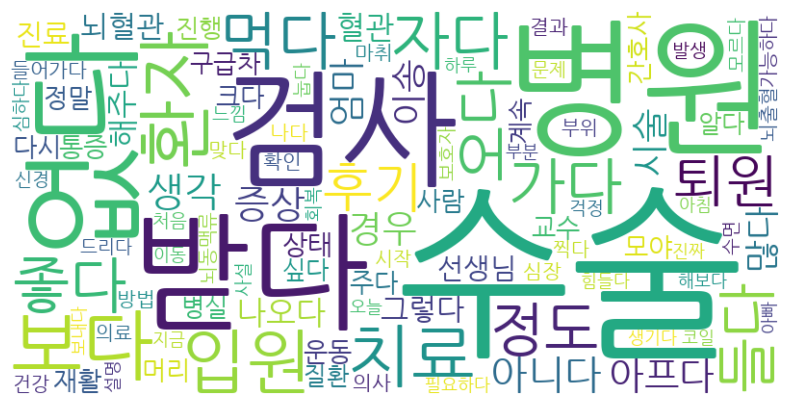

In [ ]:
# Korean version

#  Set the file path (use the same path as when it was saved).
input_file_path = '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_all.pkl'

# Loading a Counter object from a pickle file
with open(input_file_path, 'rb') as file:
    loaded_word_freq = pickle.load(file)

# Check the imported data
print(loaded_word_freq)

# Update the Counter object (KOR: Counter 객체 업데이트)
word_freq = Counter()
word_freq.update(loaded_word_freq)

# Extract the top 100 most common words(KOR: 빈도 분석 결과 상위 100개 단어 추출)
top_words = word_freq.most_common(100)

# Generate a word cloud (KOR: 워드 클라우드 생성)
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(top_words))

# Visualize the word cloud (KOR: 시각화)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Select the top 100 most frequent words (kor: 가장 빈도가 높은 단어 100개 선택)
top_words = loaded_word_freq.most_common(100)

translated_words = {}

# Perform translation and store the results (KOR: 번역 실행 및 결과 저장)
for word, freq in tqdm(top_words, desc="번역 중"):
    translated = translate_text(word, credentials_path=credentials_path)
    translated_words[translated] = freq

# Print the translated results (KOR: 번역된 결과 출력)
print(translated_words)

# Save the translated results to a file (KOR: 번역된 결과를 파일로 저장)
save_translated_words_to_pickle(translated_words, '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_all_translated.pkl')

번역 중: 100%|██████████| 100/100 [00:18<00:00,  5.42it/s]

{'surgery': 11501, 'hospital': 6744, 'receive': 5005, 'test': 4892, 'does not exist': 4531, 'see': 4309, 'patient': 4065, 'Admission': 3883, 'therapy': 3620, 'sleep': 3099, 'eat': 3065, 'go': 2848, 'good night': 2840, 'come': 2756, 'Hold': 2682, 'degree': 2583, 'Discharge': 2452, 'review': 2390, 'no': 2289, 'thought': 2250, 'sick': 2215, 'Symptom': 2166, 'case': 2002, 'Surgery': 1986, 'mom': 1953, 'many': 1893, 'transfer': 1869, 'come out': 1858, 'do it': 1793, 'blood vessel': 1763, 'Yes': 1739, 'cerebral blood vessels': 1692, 'diagnosis': 1610, 'teacher': 1607, 'situation': 1528, 'professor': 1455, 'again': 1445, 'work out': 1443, 'head': 1431, 'rehabilitation': 1423, 'big': 1385, 'What is it': 1362, 'person': 1332, 'nurse': 1321, 'really': 816, 'ache': 1307, 'give': 939, 'ambulance': 1261, 'progress': 1251, 'want': 1248, 'know': 1244, 'continue': 1243, 'ward': 1217, 'disease': 1183, 'enter': 1171, 'check': 1169, 'grow': 1165, 'result': 1156, 'doctor': 1142, 'heart': 1115, 'right': 11

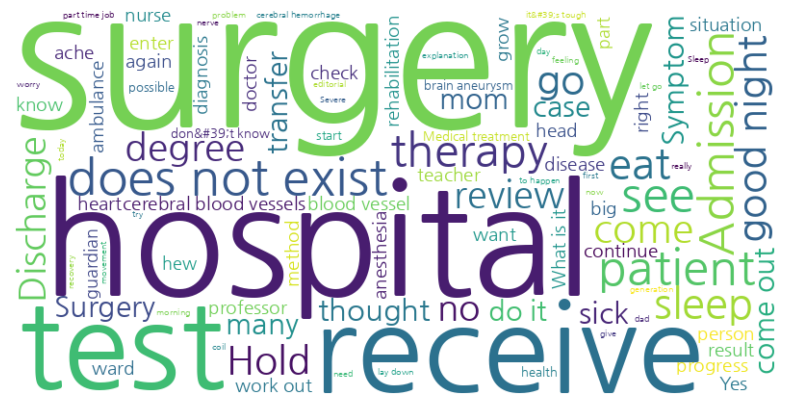

In [ ]:
# Load translated results from the imported file (KOR: 불러온 파일에서 번역된 결과 가져오기)
translated_words = load_translated_words_from_pickle('/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_all_translated.pkl')

# Generate a word cloud (KOR: 워드 클라우드 생성)
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(translated_words))

# Visualize the word cloud (KOR: 시각화)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 1.2 Brain (CEREBROVASCULAR DISEASES)

Counter({'수술': 8764, '병원': 5623, '검사': 4215, '받다': 4185, '없다': 3768, '보다': 3758, '환자': 3567, '입원': 3301, '치료': 3117, '자다': 2655, '먹다': 2539, '가다': 2445, '오다': 2439, '좋다': 2406, '들다': 2238, '정도': 2021, '후기': 2019, '아니다': 1999, '퇴원': 1993, '생각': 1974, '아프다': 1860, '증상': 1819, '엄마': 1792, '이송': 1774, '뇌혈관': 1627, '많다': 1607, '해주다': 1596, '시술': 1592, '나오다': 1590, '혈관': 1566, '경우': 1562, '그렇다': 1514, '선생님': 1427, '진료': 1421, '모야': 1361, '재활': 1323, '운동': 1317, '상태': 1301, '교수': 1301, '머리': 1284, '다시': 1248, '구급차': 1201, '정말': 1175, '간호사': 1174, '크다': 1127, '사람': 1123, '주다': 1120, '진행': 1072, '병실': 1067, '알다': 1066, '계속': 1053, '싶다': 1053, '결과': 1010, '나다': 997, '들어가다': 986, '맞다': 950, '질환': 947, '뇌동맥류': 938, '뇌출혈': 927, '찍다': 925, '의료': 897, '보호자': 890, '의사': 887, '수면': 881, '통증': 879, '모르다': 878, '건강': 846, '사설': 844, '드리다': 840, '시작': 833, '방법': 832, '확인': 828, '신경': 825, '마취': 825, '부위': 814, '가능하다': 813, '느낌': 806, '코일': 795, '눕다': 794, '처음': 793, '아침': 781, '심장': 780, '아빠': 754, '해보다':

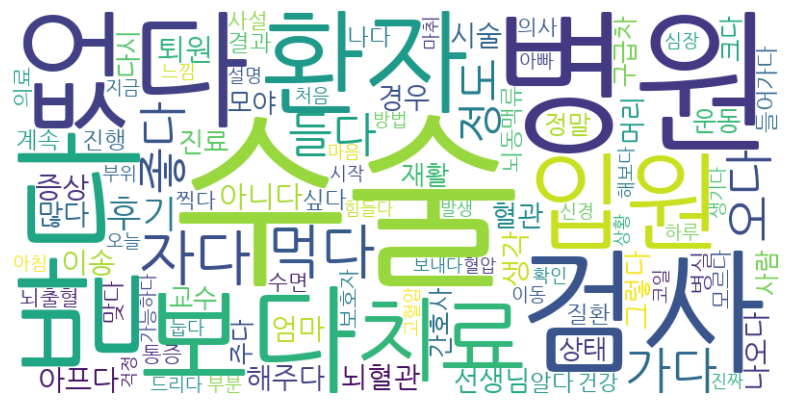

In [ ]:
# Set file path (KOR: 파일 경로 설정 (저장했을 때와 동일한 경로를 사용하세요))
input_file_path = '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_brain.pkl'

# Load Counter object from pickle file (KOR: pickle 파일에서 Counter 객체 불러오기)
with open(input_file_path, 'rb') as file:
    loaded_word_freq = pickle.load(file)

# Check loaded data (KOR: 불러온 데이터 확인)
print(loaded_word_freq)

# Update Counter object(KOR; Counter 객체 업데이트)
word_freq = Counter()
word_freq.update(loaded_word_freq)

# Extract top 100 words from frequency analysis results (KOR: 빈도 분석 결과 상위 100개 단어 추출)
top_words = word_freq.most_common(100)

# Create word cloud (KOR: 워드 클라우드 생성)
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(top_words))

# Visualization (KOR: 시각화)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Select the top 100 most frequent words (kor:가장 빈도가 높은 단어 100개 선택
top_words = loaded_word_freq.most_common(100)

#translated_words = {}

# Perform translation and store the results (KOR:번역 실행 및 결과 저장
for word, freq in tqdm(top_words, desc="번역 중"):
    translated = translate_text(word, credentials_path=credentials_path)
    translated_words[translated] = freq

# Print the translated results (KOR: 번역된 결과 출력
print(translated_words)

#Save the translated results to a file (KOR:  번역된 결과를 파일로 저장
save_translated_words_to_pickle(translated_words, '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_brain_translated.pkl')

번역 중: 100%|██████████| 100/100 [00:19<00:00,  5.07it/s]

{'surgery': 8764, 'hospital': 5623, 'test': 4215, 'receive': 4185, 'does not exist': 3768, 'see': 3758, 'patient': 3567, 'Admission': 3301, 'therapy': 3117, 'sleep': 2655, 'eat': 2539, 'go': 2445, 'come': 2439, 'good night': 2406, 'Hold': 2238, 'degree': 2021, 'review': 2019, 'no': 1999, 'Discharge': 1993, 'thought': 1974, 'sick': 1860, 'Symptom': 1819, 'mom': 1792, 'transfer': 1774, 'cerebral blood vessels': 1627, 'many': 1607, 'do it': 1596, 'Surgery': 1592, 'come out': 1590, 'blood vessel': 1566, 'case': 1562, 'Yes': 1514, 'teacher': 1427, 'diagnosis': 1421, 'What is it': 1361, 'rehabilitation': 1323, 'work out': 1317, 'situation': 698, 'professor': 1301, 'head': 1284, 'again': 1248, 'ambulance': 1201, 'really': 696, 'nurse': 1174, 'big': 1127, 'person': 1123, 'give': 840, 'progress': 1072, 'ward': 1067, 'know': 1066, 'continue': 1053, 'want': 1053, 'result': 1010, 'grow': 997, 'enter': 986, 'right': 950, 'disease': 947, 'brain aneurysm': 938, 'cerebral hemorrhage': 927, 'hew': 925,

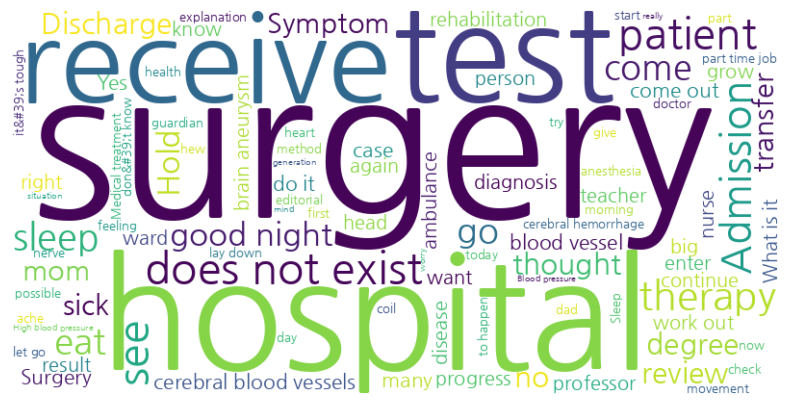

In [ ]:
# Check the translated loaded data (KOR: 불러온 파일에서 번역된 결과 가져오기
translated_words = load_translated_words_from_pickle('/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_brain_translated.pkl')

# Create word cloud (KOR: 워드 클라우드 생성)
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(translated_words))

# Visualization (KOR: 시각화)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 1.3 Heart (CARDIOVASCULAR )

Counter({'수술': 2307, '병원': 898, '받다': 674, '없다': 625, '정도': 504, '검사': 503, '입원': 466, '가슴': 436, '환자': 422, '먹다': 422, '치료': 418, '통증': 410, '보다': 408, '경우': 400, '퇴원': 389, '유방': 361, '좋다': 353, '자다': 343, '들다': 336, '시술': 321, '확인': 313, '후기': 311, '가다': 308, '심장': 304, '증상': 297, '아프다': 294, '사용': 283, '부작용': 252, '방법': 239, '마취': 236, '오다': 232, '크기': 228, '아니다': 226, '많다': 226, '의사': 223, '회복': 218, '개월': 217, '크다': 216, '걸리다': 213, '심하다': 211, '상담': 205, '진통제': 204, '질환': 203, '생각': 203, '흉부': 202, '복용': 193, '나오다': 192, '상태': 190, '발생': 187, '부위': 186, '붓기': 185, '문제': 178, '걱정': 176, '사람': 176, '통해': 171, '필요하다': 168, '정상': 165, '다시': 163, '인공': 160, '그렇다': 159, '판막': 159, '대한': 156, '진행': 156, '혈관': 151, '해주다': 147, '싶다': 146, '말다': 144, '제거': 142, '쉬다': 141, '가능하다': 140, '대동맥': 140, '알다': 139, '인하다': 138, '선생님': 137, '계속': 136, '들어가다': 135, '느끼다': 135, '코로나': 135, '가장': 133, '염증': 133, '중요하다': 130, '진단': 130, '결정': 130, '진료': 130, '모든': 128, '스트레스': 128, '방문': 125, '맞다': 124

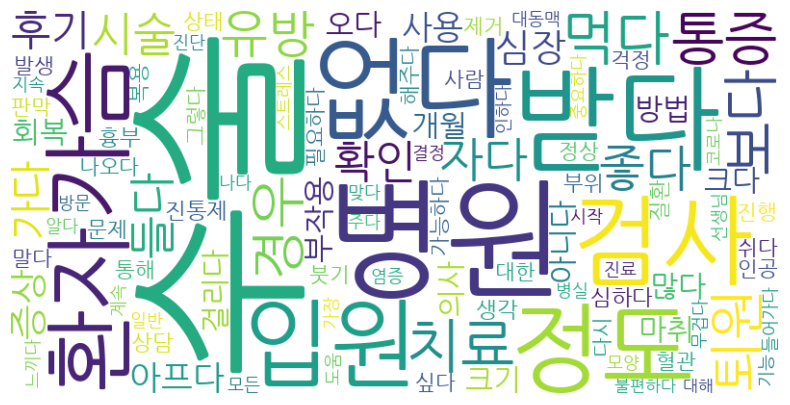

In [ ]:
# Set file path (KOR: 파일 경로 설정 (저장했을 때와 동일한 경로를 사용하세요))
input_file_path = '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_heart.pkl'

# Load Counter object from pickle file (KOR: pickle 파일에서 Counter 객체 불러오기)
with open(input_file_path, 'rb') as file:
    loaded_word_freq = pickle.load(file)

# Check loaded data (KOR: 불러온 데이터 확인)
print(loaded_word_freq)

# Update Counter object(KOR; Counter 객체 업데이트)
word_freq = Counter()
word_freq.update(loaded_word_freq)

## Extract top 100 words from frequency analysis results
top_words = word_freq.most_common(100)

# Create word cloud (KOR: 워드 클라우드 생성)
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(top_words))


# Visualization (KOR: 시각화)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Select the top 100 most frequent words (kor:가장 빈도가 높은 단어 100개 선택
top_words = loaded_word_freq.most_common(100)

translated_words = {}

# Perform translation and store the results (KOR:번역 실행 및 결과 저장
for word, freq in tqdm(top_words, desc="번역 중"):
    translated = translate_text(word, credentials_path=credentials_path)
    translated_words[translated] = freq

# Print the translated results (KOR: 번역된 결과 출력
print(translated_words)

#Save the translated results to a file (KOR:  번역된 결과를 파일로 저장
save_translated_words_to_pickle(translated_words, '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_heart_translated.pkl')

번역 중: 100%|██████████| 100/100 [00:21<00:00,  4.73it/s]

{'surgery': 2307, 'hospital': 898, 'receive': 674, 'does not exist': 625, 'degree': 504, 'test': 503, 'Admission': 466, 'chest': 436, 'patient': 422, 'eat': 422, 'therapy': 418, 'ache': 410, 'see': 408, 'case': 400, 'Discharge': 389, 'breast': 361, 'good night': 353, 'sleep': 343, 'Hold': 336, 'Surgery': 321, 'check': 313, 'review': 311, 'go': 308, 'heart': 304, 'Symptom': 297, 'sick': 294, 'use': 283, 'side effect': 252, 'method': 239, 'anesthesia': 236, 'come': 232, 'size': 228, 'no': 226, 'many': 226, 'doctor': 223, 'recovery': 218, 'month': 217, 'big': 216, 'hang': 213, 'Severe': 211, 'consulting': 205, 'painkiller': 204, 'disease': 203, 'thought': 203, 'thorax': 202, 'taking': 193, 'come out': 192, 'situation': 190, 'generation': 187, 'part': 186, 'swelling': 185, 'problem': 178, 'worry': 176, 'person': 176, 'through': 171, 'need': 168, 'normal': 165, 'again': 163, 'art': 160, 'Yes': 159, 'valve': 159, 'About': 156, 'progress': 156, 'blood vessel': 151, 'do it': 147, 'want': 146, 

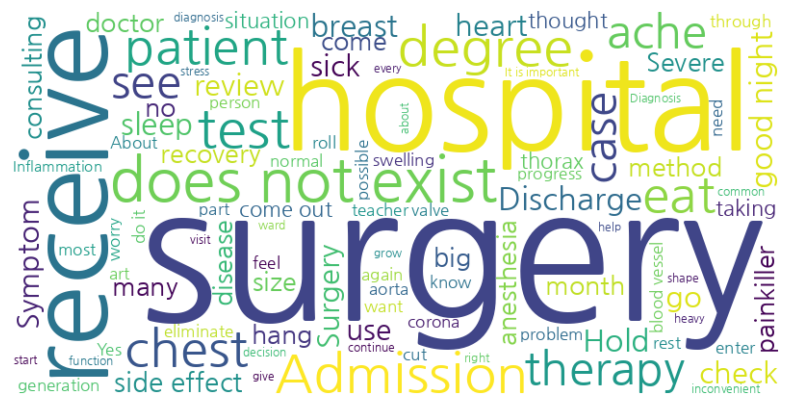

In [ ]:
# Check the translated loaded data (KOR: 불러온 파일에서 번역된 결과 가져오기
translated_words = load_translated_words_from_pickle('/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_heart_translated.pkl')

# Create word cloud (KOR: 워드 클라우드 생성)
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(translated_words))

# Visualization (KOR: 시각화)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 1.4 to Excel

In [ ]:
# List of file paths(KOR: 파일 경로 리스트)
input_file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_heart.pkl',
    '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_brain.pkl',
    '/content/drive/MyDrive/Colab Notebooks/senti/wc/word_freq_all.pkl'
]

data_frames = []

# Iterate over the file paths and add Counter objects to the dataframe.
# 파일 경로를 순회하며 Counter 객체를 데이터프레임에 추가합니다.
for input_file_path in input_file_paths:
    # pickle 파일에서 Counter 객체 불러오기
    with open(input_file_path, 'rb') as file:
        loaded_word_freq = pickle.load(file)

    # Convert Counter objects to dataframes
    # Counter 객체를 데이터프레임으로 변환
    df = pd.DataFrame(list(loaded_word_freq.items()), columns=['단어', '빈도'])

    data_frames.append(df)

# Merge all dataframes horizontally.
# 모든 데이터프레임을 가로로 합칩니다.
result_df = pd.concat(data_frames, axis=1)

# Print the results.
# 결과를 출력합니다.
print(result_df)

        단어      빈도   단어      빈도   단어     빈도
0       가슴   436.0  요실금   262.0  요실금    264
1       수술  2307.0   수술  8764.0   수술  11501
2       후기   311.0   후기  2019.0   후기   2390
3       사진   111.0   개선   194.0   개선    279
4       후회     8.0   계절    12.0   계절     17
...    ...     ...  ...     ...  ...    ...
17854  NaN     NaN  NaN     NaN  상남자      1
17855  NaN     NaN  NaN     NaN  횡격막      1
17856  NaN     NaN  NaN     NaN  립선암      1
17857  NaN     NaN  NaN     NaN   점착      1
17858  NaN     NaN  NaN     NaN  여태껏      1

[17859 rows x 6 columns]


In [ ]:
result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/senti/wc/frequency.csv', index=False)

## 2.Asscociation Analysis

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/data_merge.csv')

In [ ]:
# Na Delete
nan_rows_before = df[df['Contents'].isna()]
df = df.dropna(subset=['Contents'])
nan_rows_after = df[df['Contents'].isna()]

# Na Check
num_rows_removed = len(nan_rows_before) - len(nan_rows_after)
print(num_rows_removed)

20


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate transaction data based on the 'Contents' column
# 'Contents' 열을 기반으로 트랜잭션 데이터 생성
transactions = [content.split() for content in df['Contents']]

# Preprocess data
# 데이터 전처리
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using the Apriori algorithm
# Apriori 알고리즘을 사용한 빈발 아이템셋 찾기
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
# 연관성 규칙 생성
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Output results
# 결과 출력
print("빈발 아이템셋:")
print(frequent_itemsets)

print("\n연관성 규칙:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


빈발 아이템셋:
        support               itemsets
0      0.265293                    (-)
1      0.203696                    (/)
2      0.303845                   (1.)
3      0.309473                   (2.)
4      0.284622                   (3.)
...         ...                    ...
14996  0.202634  (수, 잘, 하는, 있는, 하고, 후)
14997  0.201678   (수, 잘, 한, 있는, 하고, 후)
14998  0.207413   (수, 후, 잘, 있는, 하고, 할)
14999  0.200191   (수, 잘, 하는, 한, 있는, 후)
15000  0.206138   (수, 후, 잘, 하는, 있는, 할)

[15001 rows x 2 columns]

연관성 규칙:
          antecedents consequents  antecedent support  consequent support  \
0                 (-)         (수)            0.265293            0.844732   
1                 (-)        (있는)            0.265293            0.750106   
2                 (-)         (잘)            0.265293            0.709537   
3                (2.)        (1.)            0.309473            0.303845   
4                (1.)        (2.)            0.303845            0.309473   
...               ...     

In [ ]:
# Labeling
# 라벨링
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.xticks(range(len(top_words)), [item[0] for item in top_words], rotation=45, ha='right', fontproperties=fontprop)
plt.xlabel('단어', fontproperties=fontprop)
plt.ylabel('빈도', fontproperties=fontprop)

# Frequency display
# 빈도 수 표시
fontprop = fm.FontProperties(fname=font_path, size=7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='black', fontproperties=fontprop)

# Part B : Model(KoBERT) Learning


The model was trained using the provided training dataset, and the best-performing model was saved as a .pt file based on accuracy.

As observed in the earlier rough version, many parts of the original code failed to execute properly.

Therefore, adjustments were made starting from the tokenizer and model loading processes.

Due to the high computational requirements, running the model on a local machine was found to be impractical.


>https://github.com/SKTBrain/KoBERT
>https://github.com/ChangZero/koBERT-finetuning-demo/blob/main/kobert_colab.ipynb




## 0.Intro

In [ ]:
# Font Update & Install
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [ ]:
# install packs
!pip install konlpy
!pip install gluonnlp
!pip install mxnet
!pip install sentencepiece
!pip install transformers
!pip install torch>=1.8.1

# ★
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp310-cp310-linux_x86_64.whl size=661763 sha256=a97ff92e050510ad17543e7313cc1e20141cd03d91eb63a9a1a39707d08e79e2
  Stored in directory: /root/.cache/pip/wheels/1a/1e/0d/99f55911d90f2b95b9f7c176d5813ef3622894a4b30fde6bd3
Successfully built gluonnlp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-guq7vl18/kobert-tokenizer_a52a5e00301c46079354321303d0781b
  Running command git clone --filter=blob

In [ ]:
!pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.


In [ ]:
# Import
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from nltk.probability import FreqDist
from matplotlib import font_manager, rc
from collections import Counter

from wordcloud import WordCloud
import matplotlib.font_manager as fm

from tqdm import tqdm
import time
import pickle
import seaborn as sns


import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

# ★ Hugging Face를 통한 모델 및 토크나이저 Import
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

import datetime

In [ ]:
# Font Path Set
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# Google Drive Mount (Path set)
drive.mount("/content/drive")

Mounted at /content/drive


## 1.Definition & Initialize

In [ ]:
# BERTSentenceTransform Class Definition (일부 수정)
class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')

In [ ]:
# BERTDataset Class Definition
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [1]:
#Declare "get_kobert_model"
# kobert 공식 git에 있는 get_kobert_model 선언
def get_kobert_model(model_path, vocab_file, ctx="cpu"):
    bertmodel = BertModel.from_pretrained(model_path)
    device = torch.device(ctx)
    bertmodel.to(device)
    bertmodel.eval()
    vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(vocab_file,
                                                         padding_token='[PAD]')
    return bertmodel, vocab_b_obj

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 6,   # 감정 클래스 수로 조정
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
# Initialize
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

In [ ]:
# Setting parameters

max_len = 64   # Maximum length of input sequences (used for truncation or padding)
               # 입력 문장의 최대 길이. BERT 모델은 고정된 크기의 입력을 필요로 하기 때문에, 이 값은 문장을 해당 길이로 자르거나 패딩하는 데 사용.

batch_size = 64  # Number of samples per training batch
                 # 학습 중에 사용되는 미니배치의 크기. 모델이 한 번에 처리하는 데이터 샘플의 수를 나타냅니다.
warmup_ratio = 0.1   # Warm-up ratio for gradual learning rate increase at the beginning
                     # 옵티마이저의 학습률을 초기에 조금씩 증가시키는데 사용되는 비율. 초기 학습 단계에서는 학습률을 점진적으로 증가시켜 안정적인 학습을 돕는 역할
num_epochs = 3    # Number of complete passes through the training dataset
                  # 전체 데이터셋을 몇 번 반복하여 학습할 것인지를 나타내는 에폭의 수
max_grad_norm = 1   # Maximum gradient norm for gradient clipping (to stabilise training)
                    # 그래디언트 클리핑을 위한 값으로, 그래디언트의 L2 노름이 이 값보다 크면 잘라내어 안정적인 학습을 도움
log_interval = 200   #Interval (in steps) to log training progress
                     # 학습 중에 로그를 출력하는 간격. 예를 들어, 매 n번의 미니배치마다 로그를 출력할 수 있음
learning_rate =  5e-5  # Learning rate for the optimizer
                      # 모델 학습에 사용되는 학습률. 모델의 가중치를 업데이트할 때 사용되는 학습 속도를 나타냄

In [ ]:
# Torch GPU 설정
device_type = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_type)

In [ ]:
model = BERTClassifier(bertmodel, dr_rate = 0.5).to(device)

## 2.Train Set Read

In [ ]:
# Csv Read
chatbot_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/train_set_final.csv')

In [ ]:
# List
data_list = []

for q, label in zip(chatbot_data['Sentence'], chatbot_data['Emotion'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

#train & test split
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(data_list, test_size=0.1, random_state=45, shuffle = True)

print(len(dataset_train), len(dataset_test))

In [ ]:
# For KoBERT
data_train = BERTDataset(dataset_train, 0, 1, tokenizer, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tokenizer, vocab, max_len, True, False)

train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

## 3.Fit

In [ ]:
# Setting
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr = learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 loss function

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps = warmup_step, num_training_steps = t_total)

In [ ]:
# Model Learning and Best Model Save
train_history = []
test_history = []
loss_history = []

best_acc=0.0
best_loss=99999999

ckpt_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/"  # 현재 시간을 포함한 파일명 생성

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
ckpt_name = f"{ckpt_path}saved_model_{timestamp}.pt"              # SAVE


for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        # print(label.shape, out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1))), test_history.append(test_acc / (batch_id+1))
    # train_history.append(train_acc / (batch_id+1))

    # .eval() : nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
    # 즉, model이 Dropout이나 BatNorm2d를 사용하는 경우, train 시에는 사용하지만 evaluation을 할 때에는 사용하지 않도록 설정해주는 함수
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_loss=loss_fn(out,label)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))


    if test_acc>best_acc and test_loss.data.cpu().numpy()<best_loss:
      torch.save({'epoch':e+1,
                  'model_state_dict':model.state_dict(),
                  'optimizer_state_dict':optimizer.state_dict(),
                  'loss':test_loss.data.cpu().numpy()},
                 ckpt_name)
      best_loss=test_loss.data.cpu().numpy()
      bset_acc=test_acc

      print('current best model saved')

In [ ]:
# 모델 저장(수동)
ckpt_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/"
torch.save(model.state_dict(), ckpt_path + "saved_model.pth")

## 4.FIT ver out

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 3,   # Adjust by emotion class number (감정 클래스 수로 조정)
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel, dr_rate = 0.5).to(device)

In [ ]:
# Csv Read
chatbot_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/train_set_ver.4.csv')

In [ ]:
# List
data_list = []

for q, label in zip(chatbot_data['Sentence'], chatbot_data['Emotion'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

#train & test split
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(data_list, test_size=0.1, random_state=45, shuffle = True)

print(len(dataset_train), len(dataset_test))

68301 7589


In [ ]:
# For KoBERT
data_train = BERTDataset(dataset_train, 0, 1, tokenizer, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tokenizer, vocab, max_len, True, False)

train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

In [ ]:
# Setting
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr = learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 loss function

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps = warmup_step, num_training_steps = t_total)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Model Learning and Best Model Save
train_history = []
test_history = []
loss_history = []

best_acc=0.0
best_loss=99999999

ckpt_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/"  # 현재 시간을 포함한 파일명 생성

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M")
ckpt_name = f"{ckpt_path}KoBERT_SA8_best_save_{timestamp}.pt"              # SAVE


for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        # print(label.shape, out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1))), test_history.append(test_acc / (batch_id+1))
    # train_history.append(train_acc / (batch_id+1))

    # .eval() : nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
    # 즉, model이 Dropout이나 BatNorm2d를 사용하는 경우, train 시에는 사용하지만 evaluation을 할 때에는 사용하지 않도록 설정해주는 함수
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_loss=loss_fn(out,label)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))

    if test_acc>best_acc and test_loss.data.cpu().numpy()<best_loss:
      torch.save({'epoch':e+1,
                  'model_state_dict':model.state_dict(),
                  'optimizer_state_dict':optimizer.state_dict(),
                  'loss':test_loss.data.cpu().numpy()},
                 ckpt_name)
      best_loss=test_loss.data.cpu().numpy()
      bset_acc=test_acc

      print('current best model saved')

  0%|          | 1/1068 [00:01<32:12,  1.81s/it]

epoch 1 batch id 1 loss 1.0369946956634521 train acc 0.375


  3%|▎         | 30/1068 [00:07<04:27,  3.88it/s]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
import datetime

# Model Learning and Best Model Save
train_history = []
test_history = []
loss_history = []

best_acc = 0.0
best_loss = 99999999

ckpt_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/"  # 현재 시간을 포함한 파일명 생성

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M")
ckpt_name = f"{ckpt_path}KoBERT_SA8_best_save_{timestamp}.pt"  # SAVE

performance_file_path = f"/content/drive/MyDrive/Colab Notebooks/senti/performance_{timestamp}.txt"

with open(performance_file_path, 'w') as performance_file:
    for e in range(num_epochs):
        train_acc = 0.0
        test_acc = 0.0
        model.train()
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
            optimizer.zero_grad()
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)

            loss = loss_fn(out, label)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
            optimizer.step()
            scheduler.step()  # Update learning rate schedule
            train_acc += calc_accuracy(out, label)

            if batch_id % log_interval == 0:
                print("epoch {} batch id {} loss {} train acc {}".format(e + 1, batch_id + 1, loss.data.cpu().numpy(),
                                                                          train_acc / (batch_id + 1)))
                train_history.append(train_acc / (batch_id + 1))
                loss_history.append(loss.data.cpu().numpy())

        print("epoch {} test acc {}".format(e + 1, test_acc / (batch_id + 1)))
        test_history.append(test_acc / (batch_id + 1))

        # .eval() : nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
        # 즉, model이 Dropout이나 BatNorm2d를 사용하는 경우, train 시에는 사용하지만 evaluation을 할 때에는 사용하지 않도록 설정해주는 함수
        model.eval()
        all_predictions = []
        all_labels = []

        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            test_loss = loss_fn(out, label)
            test_acc += calc_accuracy(out, label)

            predictions = torch.argmax(out, dim=1).cpu().numpy()
            all_predictions.extend(predictions)
            all_labels.extend(label.cpu().numpy())

        print("epoch {} test acc {}".format(e + 1, test_acc / (batch_id + 1)))
        test_history.append(test_acc / (batch_id + 1))

        # Calculate classification report
        class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7']
        classification_rep = classification_report(all_labels, all_predictions, target_names=class_names)
        print("Classification Report:")
        print(classification_rep)

        # Write performance metrics to the file
        performance_file.write(f"Epoch {e+1}:\n")
        performance_file.write(f"Train Accuracy: {train_history[-1]}\n")
        performance_file.write(f"Test Accuracy: {test_history[-1]}\n")
        performance_file.write("Classification Report:\n")
        performance_file.write(classification_rep)
        performance_file.write("\n\n")

        if test_acc > best_acc and test_loss.data.cpu().numpy() < best_loss:
            torch.save({'epoch': e + 1,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': test_loss.data.cpu().numpy()},
                       ckpt_name)
            best_loss = test_loss.data.cpu().numpy()
            best_acc = test_acc

            print('current best model saved')

# Print the file path where the performance metrics are saved
print(f"Performance metrics saved at: {performance_file_path}")


  0%|          | 1/1068 [00:01<25:14,  1.42s/it]

epoch 1 batch id 1 loss 1.9380289316177368 train acc 0.296875


 19%|█▉        | 202/1068 [00:41<02:52,  5.03it/s]

epoch 1 batch id 201 loss 1.7126564979553223 train acc 0.30200559701492535


 38%|███▊      | 402/1068 [01:21<02:13,  5.00it/s]

epoch 1 batch id 401 loss 1.243235468864441 train acc 0.4021197007481297


 56%|█████▋    | 602/1068 [02:01<01:32,  5.02it/s]

epoch 1 batch id 601 loss 0.9387727379798889 train acc 0.48505095673876875


 75%|███████▌  | 802/1068 [02:41<00:53,  5.02it/s]

epoch 1 batch id 801 loss 0.8929004669189453 train acc 0.5364193196004994


 94%|█████████▍| 1002/1068 [03:21<00:13,  5.01it/s]

epoch 1 batch id 1001 loss 0.6048099398612976 train acc 0.5706324925074925


100%|██████████| 1068/1068 [03:34<00:00,  4.99it/s]

epoch 1 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 1 test acc 0.712206166250284
Classification Report:
              precision    recall  f1-score   support

     class_0       0.81      0.85      0.83       845
     class_1       0.76      0.65      0.70       372
     class_2       0.59      0.70      0.64       642
     class_3       0.82      0.43      0.57       995
     class_4       0.78      0.47      0.59       344
     class_5       0.82      0.48      0.61      1423
     class_6       0.65      0.92      0.76      2650
     class_7       0.91      0.88      0.89       318

    accuracy                           0.71      7589
   macro avg       0.77      0.67      0.70      7589
weighted avg       0.74      0.71      0.70      7589

current best model saved


  0%|          | 1/1068 [00:00<07:16,  2.44it/s]

epoch 2 batch id 1 loss 0.7019894123077393 train acc 0.75


 19%|█▉        | 202/1068 [00:40<02:52,  5.02it/s]

epoch 2 batch id 201 loss 0.55852210521698 train acc 0.722714552238806


 38%|███▊      | 402/1068 [01:20<02:13,  5.00it/s]

epoch 2 batch id 401 loss 0.7753155827522278 train acc 0.7274781795511222


 56%|█████▋    | 602/1068 [02:00<01:32,  5.01it/s]

epoch 2 batch id 601 loss 0.6352061033248901 train acc 0.7313331946755408


 75%|███████▌  | 802/1068 [02:40<00:53,  5.01it/s]

epoch 2 batch id 801 loss 0.7139648795127869 train acc 0.7353113295880149


 94%|█████████▍| 1002/1068 [03:20<00:13,  5.00it/s]

epoch 2 batch id 1001 loss 0.5027697086334229 train acc 0.739010989010989


100%|██████████| 1068/1068 [03:33<00:00,  5.00it/s]

epoch 2 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 2 test acc 0.7420118385191915
Classification Report:
              precision    recall  f1-score   support

     class_0       0.87      0.85      0.86       845
     class_1       0.80      0.68      0.73       372
     class_2       0.69      0.69      0.69       642
     class_3       0.69      0.57      0.62       995
     class_4       0.84      0.50      0.63       344
     class_5       0.73      0.63      0.68      1423
     class_6       0.70      0.87      0.78      2650
     class_7       0.96      0.86      0.91       318

    accuracy                           0.74      7589
   macro avg       0.79      0.71      0.74      7589
weighted avg       0.75      0.74      0.74      7589

current best model saved


  0%|          | 1/1068 [00:00<07:13,  2.46it/s]

epoch 3 batch id 1 loss 0.5909728407859802 train acc 0.78125


 19%|█▉        | 202/1068 [00:40<02:52,  5.02it/s]

epoch 3 batch id 201 loss 0.5173779129981995 train acc 0.7699782338308457


 38%|███▊      | 402/1068 [01:20<02:13,  4.99it/s]

epoch 3 batch id 401 loss 0.6368507742881775 train acc 0.7692097880299252


 56%|█████▋    | 602/1068 [02:00<01:32,  5.01it/s]

epoch 3 batch id 601 loss 0.5090106725692749 train acc 0.7717606073211315


 75%|███████▌  | 801/1068 [02:40<00:53,  5.00it/s]

epoch 3 batch id 801 loss 0.6518435478210449 train acc 0.7754174469413233


 94%|█████████▍| 1002/1068 [03:20<00:13,  5.00it/s]

epoch 3 batch id 1001 loss 0.42032143473625183 train acc 0.7788305444555444


100%|██████████| 1068/1068 [03:33<00:00,  5.00it/s]

epoch 3 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 3 test acc 0.7409862593686124
Classification Report:
              precision    recall  f1-score   support

     class_0       0.84      0.87      0.86       845
     class_1       0.79      0.66      0.72       372
     class_2       0.67      0.66      0.66       642
     class_3       0.64      0.62      0.63       995
     class_4       0.82      0.49      0.62       344
     class_5       0.68      0.71      0.70      1423
     class_6       0.76      0.80      0.78      2650
     class_7       0.88      0.91      0.89       318

    accuracy                           0.74      7589
   macro avg       0.76      0.72      0.73      7589
weighted avg       0.74      0.74      0.74      7589



  0%|          | 2/1068 [00:00<05:08,  3.46it/s]

epoch 4 batch id 1 loss 0.4897688627243042 train acc 0.8125


 19%|█▉        | 202/1068 [00:40<02:53,  4.99it/s]

epoch 4 batch id 201 loss 0.38111016154289246 train acc 0.8056592039800995


 38%|███▊      | 402/1068 [01:20<02:13,  5.00it/s]

epoch 4 batch id 401 loss 0.5422016382217407 train acc 0.8068890274314214


 56%|█████▋    | 601/1068 [02:00<01:33,  4.98it/s]

epoch 4 batch id 601 loss 0.48403051495552063 train acc 0.8111220881863561


 75%|███████▌  | 801/1068 [02:40<00:53,  5.00it/s]

epoch 4 batch id 801 loss 0.553584098815918 train acc 0.8145482209737828


 94%|█████████▍| 1002/1068 [03:21<00:13,  5.00it/s]

epoch 4 batch id 1001 loss 0.34509894251823425 train acc 0.8188061938061938


100%|██████████| 1068/1068 [03:34<00:00,  4.99it/s]

epoch 4 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 4 test acc 0.7465967806041335
Classification Report:
              precision    recall  f1-score   support

     class_0       0.85      0.87      0.86       845
     class_1       0.74      0.73      0.74       372
     class_2       0.68      0.69      0.68       642
     class_3       0.67      0.61      0.64       995
     class_4       0.80      0.49      0.61       344
     class_5       0.71      0.67      0.69      1423
     class_6       0.75      0.83      0.79      2650
     class_7       0.91      0.91      0.91       318

    accuracy                           0.75      7589
   macro avg       0.76      0.73      0.74      7589
weighted avg       0.75      0.75      0.74      7589

current best model saved


  0%|          | 1/1068 [00:00<07:45,  2.29it/s]

epoch 5 batch id 1 loss 0.3842757046222687 train acc 0.875


 19%|█▉        | 202/1068 [00:40<02:53,  4.99it/s]

epoch 5 batch id 201 loss 0.24945640563964844 train acc 0.8478700248756219


 38%|███▊      | 401/1068 [01:20<02:13,  4.99it/s]

epoch 5 batch id 401 loss 0.45875412225723267 train acc 0.8481140897755611


 56%|█████▋    | 601/1068 [02:00<01:34,  4.95it/s]

epoch 5 batch id 601 loss 0.27005717158317566 train acc 0.8517054908485857


 75%|███████▌  | 802/1068 [02:40<00:53,  4.99it/s]

epoch 5 batch id 801 loss 0.35993218421936035 train acc 0.8560003121098627


 94%|█████████▍| 1002/1068 [03:21<00:13,  5.00it/s]

epoch 5 batch id 1001 loss 0.30220308899879456 train acc 0.8575643106893107


100%|██████████| 1068/1068 [03:34<00:00,  4.99it/s]

epoch 5 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 5 test acc 0.7442688223938224
Classification Report:
              precision    recall  f1-score   support

     class_0       0.83      0.86      0.85       845
     class_1       0.73      0.70      0.72       372
     class_2       0.66      0.72      0.69       642
     class_3       0.72      0.58      0.65       995
     class_4       0.76      0.51      0.61       344
     class_5       0.75      0.60      0.67      1423
     class_6       0.72      0.87      0.79      2650
     class_7       0.94      0.89      0.91       318

    accuracy                           0.74      7589
   macro avg       0.77      0.72      0.73      7589
weighted avg       0.75      0.74      0.74      7589



  0%|          | 1/1068 [00:00<06:51,  2.59it/s]

epoch 6 batch id 1 loss 0.20693230628967285 train acc 0.96875


 19%|█▉        | 201/1068 [00:40<02:54,  4.96it/s]

epoch 6 batch id 201 loss 0.20651303231716156 train acc 0.882695895522388


 38%|███▊      | 402/1068 [01:20<02:13,  4.99it/s]

epoch 6 batch id 401 loss 0.35165339708328247 train acc 0.8829099127182045


 56%|█████▋    | 601/1068 [02:00<01:34,  4.96it/s]

epoch 6 batch id 601 loss 0.2250862717628479 train acc 0.8885191347753744


 75%|███████▌  | 802/1068 [02:41<00:53,  4.99it/s]

epoch 6 batch id 801 loss 0.29810917377471924 train acc 0.8913662609238452


 94%|█████████▍| 1002/1068 [03:21<00:13,  4.98it/s]

epoch 6 batch id 1001 loss 0.24202874302864075 train acc 0.8935439560439561


100%|██████████| 1068/1068 [03:34<00:00,  4.98it/s]

epoch 6 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 6 test acc 0.748041108335226
Classification Report:
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86       845
     class_1       0.76      0.74      0.75       372
     class_2       0.74      0.67      0.70       642
     class_3       0.64      0.65      0.65       995
     class_4       0.75      0.52      0.62       344
     class_5       0.69      0.70      0.69      1423
     class_6       0.76      0.81      0.78      2650
     class_7       0.97      0.88      0.92       318

    accuracy                           0.75      7589
   macro avg       0.77      0.73      0.75      7589
weighted avg       0.75      0.75      0.75      7589



  0%|          | 1/1068 [00:00<06:59,  2.54it/s]

epoch 7 batch id 1 loss 0.14989370107650757 train acc 0.9375


 19%|█▉        | 201/1068 [00:40<02:54,  4.98it/s]

epoch 7 batch id 201 loss 0.13991060853004456 train acc 0.9127798507462687


 38%|███▊      | 402/1068 [01:20<02:13,  4.98it/s]

epoch 7 batch id 401 loss 0.4308481812477112 train acc 0.9132637157107232


 56%|█████▋    | 601/1068 [02:00<01:34,  4.97it/s]

epoch 7 batch id 601 loss 0.18732500076293945 train acc 0.9162593594009983


 75%|███████▌  | 801/1068 [02:41<00:53,  4.98it/s]

epoch 7 batch id 801 loss 0.3109790086746216 train acc 0.9188319288389513


 94%|█████████▎| 1001/1068 [03:21<00:13,  4.97it/s]

epoch 7 batch id 1001 loss 0.15176324546337128 train acc 0.9206418581418582


100%|██████████| 1068/1068 [03:34<00:00,  4.98it/s]

epoch 7 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 7 test acc 0.748374687712923
Classification Report:
              precision    recall  f1-score   support

     class_0       0.85      0.88      0.86       845
     class_1       0.78      0.71      0.75       372
     class_2       0.67      0.71      0.69       642
     class_3       0.67      0.63      0.65       995
     class_4       0.73      0.52      0.61       344
     class_5       0.69      0.68      0.69      1423
     class_6       0.76      0.81      0.79      2650
     class_7       0.95      0.89      0.92       318

    accuracy                           0.75      7589
   macro avg       0.76      0.73      0.74      7589
weighted avg       0.75      0.75      0.75      7589



  0%|          | 1/1068 [00:00<06:46,  2.62it/s]

epoch 8 batch id 1 loss 0.05101216956973076 train acc 0.984375


 19%|█▉        | 202/1068 [00:40<02:53,  4.99it/s]

epoch 8 batch id 201 loss 0.0728420689702034 train acc 0.939443407960199


 38%|███▊      | 401/1068 [01:20<02:14,  4.97it/s]

epoch 8 batch id 401 loss 0.23602735996246338 train acc 0.9374610349127181


 56%|█████▋    | 601/1068 [02:00<01:34,  4.97it/s]

epoch 8 batch id 601 loss 0.0741891860961914 train acc 0.93994384359401


 75%|███████▌  | 802/1068 [02:41<00:53,  5.00it/s]

epoch 8 batch id 801 loss 0.2037217617034912 train acc 0.9421621410736579


 94%|█████████▎| 1001/1068 [03:21<00:13,  4.97it/s]

epoch 8 batch id 1001 loss 0.04757480323314667 train acc 0.9432286463536463


100%|██████████| 1068/1068 [03:34<00:00,  4.98it/s]

epoch 8 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 8 test acc 0.7471929650238474
Classification Report:
              precision    recall  f1-score   support

     class_0       0.87      0.86      0.86       845
     class_1       0.76      0.76      0.76       372
     class_2       0.68      0.71      0.70       642
     class_3       0.67      0.65      0.66       995
     class_4       0.65      0.53      0.59       344
     class_5       0.67      0.72      0.69      1423
     class_6       0.79      0.78      0.78      2650
     class_7       0.95      0.89      0.92       318

    accuracy                           0.75      7589
   macro avg       0.75      0.74      0.74      7589
weighted avg       0.75      0.75      0.75      7589



  0%|          | 2/1068 [00:00<04:55,  3.61it/s]

epoch 9 batch id 1 loss 0.052335478365421295 train acc 0.984375


 19%|█▉        | 201/1068 [00:40<02:54,  4.97it/s]

epoch 9 batch id 201 loss 0.03199952840805054 train acc 0.953125


 38%|███▊      | 401/1068 [01:20<02:13,  4.98it/s]

epoch 9 batch id 401 loss 0.15456464886665344 train acc 0.9527743142144638


 56%|█████▋    | 601/1068 [02:00<01:33,  4.97it/s]

epoch 9 batch id 601 loss 0.0448751226067543 train acc 0.9551008735440932


 75%|███████▌  | 801/1068 [02:41<00:53,  4.99it/s]

epoch 9 batch id 801 loss 0.11747008562088013 train acc 0.9561875780274657


 94%|█████████▎| 1001/1068 [03:21<00:13,  4.97it/s]

epoch 9 batch id 1001 loss 0.03958643600344658 train acc 0.957199050949051


100%|██████████| 1068/1068 [03:34<00:00,  4.98it/s]

epoch 9 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 9 test acc 0.7492583181921417
Classification Report:
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86       845
     class_1       0.76      0.74      0.75       372
     class_2       0.69      0.70      0.70       642
     class_3       0.67      0.65      0.66       995
     class_4       0.62      0.56      0.58       344
     class_5       0.69      0.70      0.69      1423
     class_6       0.78      0.80      0.79      2650
     class_7       0.94      0.89      0.91       318

    accuracy                           0.75      7589
   macro avg       0.75      0.74      0.74      7589
weighted avg       0.75      0.75      0.75      7589



  0%|          | 1/1068 [00:00<07:12,  2.47it/s]

epoch 10 batch id 1 loss 0.1012001782655716 train acc 0.96875


 19%|█▉        | 201/1068 [00:40<02:54,  4.96it/s]

epoch 10 batch id 201 loss 0.016723835840821266 train acc 0.9619869402985075


 38%|███▊      | 401/1068 [01:20<02:13,  4.99it/s]

epoch 10 batch id 401 loss 0.085590660572052 train acc 0.9599438902743143


 56%|█████▋    | 602/1068 [02:01<01:34,  4.95it/s]

epoch 10 batch id 601 loss 0.03147870674729347 train acc 0.9618084442595674


 75%|███████▌  | 801/1068 [02:41<00:53,  4.96it/s]

epoch 10 batch id 801 loss 0.16431716084480286 train acc 0.9623517478152309


 94%|█████████▎| 1001/1068 [03:21<00:13,  4.96it/s]

epoch 10 batch id 1001 loss 0.043280988931655884 train acc 0.9626623376623377


100%|██████████| 1068/1068 [03:34<00:00,  4.98it/s]

epoch 10 test acc 0.0



<ipython-input-20-dcf5106e79e6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 10 test acc 0.751621763570293
Classification Report:
              precision    recall  f1-score   support

     class_0       0.87      0.85      0.86       845
     class_1       0.75      0.75      0.75       372
     class_2       0.71      0.69      0.70       642
     class_3       0.67      0.65      0.66       995
     class_4       0.66      0.55      0.60       344
     class_5       0.69      0.70      0.69      1423
     class_6       0.77      0.81      0.79      2650
     class_7       0.94      0.89      0.92       318

    accuracy                           0.75      7589
   macro avg       0.76      0.74      0.75      7589
weighted avg       0.75      0.75      0.75      7589

Performance metrics saved at: /content/drive/MyDrive/Colab Notebooks/senti/performance_202402160408.txt


In [ ]:
from sklearn.metrics import classification_report
import datetime

# Model Learning and Best Model Save
train_history = []
test_history = []
loss_history = []

best_acc = 0.0
best_loss = 99999999

ckpt_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/"  # 현재 시간을 포함한 파일명 생성

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M")
ckpt_name = f"{ckpt_path}KoBERT_SA8_best_save_{timestamp}.pt"  # SAVE

performance_file_path = f"/content/drive/MyDrive/Colab Notebooks/senti/performance_{timestamp}.txt"

with open(performance_file_path, 'w') as performance_file:
    for e in range(num_epochs):
        train_acc = 0.0
        test_acc = 0.0
        model.train()
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
            optimizer.zero_grad()
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)

            loss = loss_fn(out, label)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
            optimizer.step()
            scheduler.step()  # Update learning rate schedule
            train_acc += calc_accuracy(out, label)

            if batch_id % log_interval == 0:
                print("epoch {} batch id {} loss {} train acc {}".format(e + 1, batch_id + 1, loss.data.cpu().numpy(),
                                                                          train_acc / (batch_id + 1)))
                train_history.append(train_acc / (batch_id + 1))
                loss_history.append(loss.data.cpu().numpy())

        print("epoch {} test acc {}".format(e + 1, test_acc / (batch_id + 1)))
        test_history.append(test_acc / (batch_id + 1))

        # .eval() : nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
        # 즉, model이 Dropout이나 BatNorm2d를 사용하는 경우, train 시에는 사용하지만 evaluation을 할 때에는 사용하지 않도록 설정해주는 함수
        model.eval()
        all_predictions = []
        all_labels = []

        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            test_loss = loss_fn(out, label)
            test_acc += calc_accuracy(out, label)

            predictions = torch.argmax(out, dim=1).cpu().numpy()
            all_predictions.extend(predictions)
            all_labels.extend(label.cpu().numpy())

        print("epoch {} test acc {}".format(e + 1, test_acc / (batch_id + 1)))
        test_history.append(test_acc / (batch_id + 1))

        # Calculate classification report
        class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5']
        classification_rep = classification_report(all_labels, all_predictions, target_names=class_names)
        print("Classification Report:")
        print(classification_rep)

        # Write performance metrics to the file
        performance_file.write(f"Epoch {e+1}:\n")
        performance_file.write(f"Train Accuracy: {train_history[-1]}\n")
        performance_file.write(f"Test Accuracy: {test_history[-1]}\n")
        performance_file.write("Classification Report:\n")
        performance_file.write(classification_rep)
        performance_file.write("\n\n")

        if test_acc > best_acc and test_loss.data.cpu().numpy() < best_loss:
            torch.save({'epoch': e + 1,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': test_loss.data.cpu().numpy()},
                       ckpt_name)
            best_loss = test_loss.data.cpu().numpy()
            best_acc = test_acc

            print('current best model saved')

# Print the file path where the performance metrics are saved
print(f"Performance metrics saved at: {performance_file_path}")


  0%|          | 1/1068 [00:00<07:15,  2.45it/s]

epoch 1 batch id 1 loss 2.004098892211914 train acc 0.046875


 19%|█▉        | 201/1068 [00:40<02:55,  4.95it/s]

epoch 1 batch id 201 loss 0.7938871383666992 train acc 0.4427860696517413


 38%|███▊      | 401/1068 [01:21<02:15,  4.93it/s]

epoch 1 batch id 401 loss 0.7036870121955872 train acc 0.623285536159601


 56%|█████▋    | 601/1068 [02:01<01:34,  4.93it/s]

epoch 1 batch id 601 loss 0.5913229584693909 train acc 0.6869280366056573


 75%|███████▌  | 801/1068 [02:42<00:54,  4.94it/s]

epoch 1 batch id 801 loss 0.6566219329833984 train acc 0.7088210049937578


 94%|█████████▎| 1001/1068 [03:22<00:13,  4.94it/s]

epoch 1 batch id 1001 loss 0.3852006494998932 train acc 0.7225899100899101


100%|██████████| 1068/1068 [03:36<00:00,  4.94it/s]

epoch 1 test acc 0.0



<ipython-input-25-a94d44bd9bf6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 1 test acc 0.7624843856461503
Classification Report:
              precision    recall  f1-score   support

     class_0       0.85      0.86      0.86       845
     class_1       0.82      0.60      0.70       372
     class_2       0.76      0.75      0.76      1637
     class_3       0.79      0.57      0.66      1767
     class_4       0.71      0.86      0.78      2650
     class_5       0.86      0.93      0.90       318

    accuracy                           0.76      7589
   macro avg       0.80      0.76      0.77      7589
weighted avg       0.77      0.76      0.76      7589

current best model saved


  0%|          | 1/1068 [00:00<07:49,  2.27it/s]

epoch 2 batch id 1 loss 0.4860365688800812 train acc 0.875


 19%|█▉        | 201/1068 [00:40<02:55,  4.94it/s]

epoch 2 batch id 201 loss 0.3966694474220276 train acc 0.7928327114427861


 38%|███▊      | 401/1068 [01:21<02:14,  4.95it/s]

epoch 2 batch id 401 loss 0.6021050810813904 train acc 0.8025249376558603


 56%|█████▋    | 601/1068 [02:01<01:34,  4.95it/s]

epoch 2 batch id 601 loss 0.4177033603191376 train acc 0.809900166389351


 75%|███████▌  | 801/1068 [02:42<00:53,  4.95it/s]

epoch 2 batch id 801 loss 0.6226499676704407 train acc 0.8087156679151061


 94%|█████████▎| 1001/1068 [03:22<00:13,  4.93it/s]

epoch 2 batch id 1001 loss 0.27699634432792664 train acc 0.8081293706293706


100%|██████████| 1068/1068 [03:35<00:00,  4.94it/s]

epoch 2 test acc 0.0



<ipython-input-25-a94d44bd9bf6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 2 test acc 0.7725946797637974
Classification Report:
              precision    recall  f1-score   support

     class_0       0.87      0.84      0.85       845
     class_1       0.75      0.75      0.75       372
     class_2       0.78      0.74      0.76      1637
     class_3       0.78      0.62      0.69      1767
     class_4       0.73      0.86      0.79      2650
     class_5       0.95      0.88      0.92       318

    accuracy                           0.77      7589
   macro avg       0.81      0.78      0.79      7589
weighted avg       0.78      0.77      0.77      7589

current best model saved


  0%|          | 1/1068 [00:00<06:56,  2.56it/s]

epoch 3 batch id 1 loss 0.35999563336372375 train acc 0.8125


 19%|█▉        | 201/1068 [00:40<02:54,  4.97it/s]

epoch 3 batch id 201 loss 0.34048253297805786 train acc 0.826181592039801


 38%|███▊      | 401/1068 [01:21<02:14,  4.95it/s]

epoch 3 batch id 401 loss 0.4515956938266754 train acc 0.8361518079800498


 56%|█████▋    | 601/1068 [02:01<01:34,  4.94it/s]

epoch 3 batch id 601 loss 0.33404508233070374 train acc 0.8456478785357737


 75%|███████▌  | 801/1068 [02:42<00:54,  4.94it/s]

epoch 3 batch id 801 loss 0.5886515378952026 train acc 0.8460713171036205


 94%|█████████▎| 1001/1068 [03:22<00:13,  4.94it/s]

epoch 3 batch id 1001 loss 0.2723582684993744 train acc 0.8458728771228772


100%|██████████| 1068/1068 [03:36<00:00,  4.94it/s]

epoch 3 test acc 0.0



<ipython-input-25-a94d44bd9bf6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 3 test acc 0.7697060243016125
Classification Report:
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86       845
     class_1       0.79      0.71      0.75       372
     class_2       0.75      0.78      0.76      1637
     class_3       0.75      0.64      0.69      1767
     class_4       0.74      0.81      0.78      2650
     class_5       0.95      0.91      0.93       318

    accuracy                           0.77      7589
   macro avg       0.81      0.78      0.79      7589
weighted avg       0.77      0.77      0.77      7589



  0%|          | 1/1068 [00:00<06:58,  2.55it/s]

epoch 4 batch id 1 loss 0.36921805143356323 train acc 0.828125


 19%|█▉        | 201/1068 [00:40<02:54,  4.96it/s]

epoch 4 batch id 201 loss 0.277523934841156 train acc 0.863106343283582


 38%|███▊      | 401/1068 [01:21<02:15,  4.94it/s]

epoch 4 batch id 401 loss 0.4033809304237366 train acc 0.8734413965087282


 56%|█████▋    | 601/1068 [02:01<01:34,  4.94it/s]

epoch 4 batch id 601 loss 0.38547399640083313 train acc 0.8813695923460898


 75%|███████▌  | 801/1068 [02:42<00:54,  4.92it/s]

epoch 4 batch id 801 loss 0.5756336450576782 train acc 0.8835245006242197


 94%|█████████▎| 1001/1068 [03:22<00:13,  4.94it/s]

epoch 4 batch id 1001 loss 0.21581242978572845 train acc 0.8833354145854145


100%|██████████| 1068/1068 [03:36<00:00,  4.94it/s]

epoch 4 test acc 0.0



<ipython-input-25-a94d44bd9bf6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 4 test acc 0.7655753179650239
Classification Report:
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86       845
     class_1       0.79      0.67      0.73       372
     class_2       0.72      0.79      0.75      1637
     class_3       0.73      0.65      0.69      1767
     class_4       0.77      0.79      0.78      2650
     class_5       0.92      0.93      0.92       318

    accuracy                           0.77      7589
   macro avg       0.80      0.78      0.79      7589
weighted avg       0.77      0.77      0.76      7589



  0%|          | 1/1068 [00:00<06:33,  2.71it/s]

epoch 5 batch id 1 loss 0.21924206614494324 train acc 0.90625


 19%|█▉        | 201/1068 [00:40<02:55,  4.93it/s]

epoch 5 batch id 201 loss 0.10873497277498245 train acc 0.8964552238805971


 38%|███▊      | 401/1068 [01:21<02:15,  4.92it/s]

epoch 5 batch id 401 loss 0.48881396651268005 train acc 0.9032496882793017


 56%|█████▋    | 601/1068 [02:01<01:34,  4.93it/s]

epoch 5 batch id 601 loss 0.20917798578739166 train acc 0.9088758319467554


 75%|███████▌  | 801/1068 [02:42<00:54,  4.93it/s]

epoch 5 batch id 801 loss 0.3563844561576843 train acc 0.9116143882646691


 94%|█████████▎| 1001/1068 [03:23<00:13,  4.91it/s]

epoch 5 batch id 1001 loss 0.14068187773227692 train acc 0.9117132867132867


100%|██████████| 1068/1068 [03:36<00:00,  4.93it/s]

epoch 5 test acc 0.0



<ipython-input-25-a94d44bd9bf6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 5 test acc 0.7673425789234612
Classification Report:
              precision    recall  f1-score   support

     class_0       0.83      0.89      0.86       845
     class_1       0.77      0.72      0.74       372
     class_2       0.79      0.73      0.76      1637
     class_3       0.74      0.63      0.68      1767
     class_4       0.73      0.84      0.78      2650
     class_5       0.93      0.91      0.92       318

    accuracy                           0.77      7589
   macro avg       0.80      0.78      0.79      7589
weighted avg       0.77      0.77      0.76      7589



  0%|          | 1/1068 [00:00<06:50,  2.60it/s]

epoch 6 batch id 1 loss 0.08760809153318405 train acc 0.984375


 19%|█▉        | 201/1068 [00:40<02:55,  4.94it/s]

epoch 6 batch id 201 loss 0.047311048954725266 train acc 0.9290267412935324


 38%|███▊      | 401/1068 [01:21<02:15,  4.93it/s]

epoch 6 batch id 401 loss 0.25429338216781616 train acc 0.9330579800498753


 56%|█████▋    | 601/1068 [02:01<01:34,  4.93it/s]

epoch 6 batch id 601 loss 0.14606550335884094 train acc 0.9368760399334443


 75%|███████▌  | 801/1068 [02:42<00:54,  4.90it/s]

epoch 6 batch id 801 loss 0.3256390392780304 train acc 0.9378316167290887


 94%|█████████▎| 1001/1068 [03:23<00:13,  4.93it/s]

epoch 6 batch id 1001 loss 0.09492863714694977 train acc 0.9378277972027972


100%|██████████| 1068/1068 [03:36<00:00,  4.93it/s]

epoch 6 test acc 0.0



<ipython-input-25-a94d44bd9bf6>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 6 test acc 0.768882722007722
Classification Report:
              precision    recall  f1-score   support

     class_0       0.85      0.87      0.86       845
     class_1       0.77      0.73      0.75       372
     class_2       0.81      0.72      0.76      1637
     class_3       0.71      0.67      0.69      1767
     class_4       0.74      0.83      0.78      2650
     class_5       0.93      0.90      0.92       318

    accuracy                           0.77      7589
   macro avg       0.80      0.78      0.79      7589
weighted avg       0.77      0.77      0.77      7589



  0%|          | 1/1068 [00:00<06:54,  2.58it/s]

epoch 7 batch id 1 loss 0.08341653645038605 train acc 0.984375


  7%|▋         | 73/1068 [00:15<03:26,  4.81it/s]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
import datetime

# Model Learning and Best Model Save
train_history = []
test_history = []
loss_history = []

best_acc = 0.0
best_loss = 99999999

ckpt_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/"  # 현재 시간을 포함한 파일명 생성

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M")
ckpt_name = f"{ckpt_path}KoBERT_SA8_best_save_{timestamp}.pt"  # SAVE

performance_file_path = f"/content/drive/MyDrive/Colab Notebooks/senti/performance_{timestamp}.txt"

with open(performance_file_path, 'w') as performance_file:
    for e in range(num_epochs):
        train_acc = 0.0
        test_acc = 0.0
        model.train()
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
            optimizer.zero_grad()
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)

            loss = loss_fn(out, label)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
            optimizer.step()
            scheduler.step()  # Update learning rate schedule
            train_acc += calc_accuracy(out, label)

            if batch_id % log_interval == 0:
                print("epoch {} batch id {} loss {} train acc {}".format(e + 1, batch_id + 1, loss.data.cpu().numpy(),
                                                                          train_acc / (batch_id + 1)))
                train_history.append(train_acc / (batch_id + 1))
                loss_history.append(loss.data.cpu().numpy())

        print("epoch {} test acc {}".format(e + 1, test_acc / (batch_id + 1)))
        test_history.append(test_acc / (batch_id + 1))

        # .eval() : nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
        # 즉, model이 Dropout이나 BatNorm2d를 사용하는 경우, train 시에는 사용하지만 evaluation을 할 때에는 사용하지 않도록 설정해주는 함수
        model.eval()
        all_predictions = []
        all_labels = []

        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length = valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            test_loss = loss_fn(out, label)
            test_acc += calc_accuracy(out, label)

            predictions = torch.argmax(out, dim=1).cpu().numpy()
            all_predictions.extend(predictions)
            all_labels.extend(label.cpu().numpy())

        print("epoch {} test acc {}".format(e + 1, test_acc / (batch_id + 1)))
        test_history.append(test_acc / (batch_id + 1))

        # Calculate classification report
        class_names = ['Positive', 'Negative', 'Neutral']
        classification_rep = classification_report(all_labels, all_predictions, target_names=class_names)
        print("Classification Report:")
        print(classification_rep)

        # Write performance metrics to the file
        performance_file.write(f"Epoch {e+1}:\n")
        performance_file.write(f"Train Accuracy: {train_history[-1]}\n")
        performance_file.write(f"Test Accuracy: {test_history[-1]}\n")
        performance_file.write("Classification Report:\n")
        performance_file.write(classification_rep)
        performance_file.write("\n\n")

        if test_acc > best_acc and test_loss.data.cpu().numpy() < best_loss:
            torch.save({'epoch': e + 1,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': test_loss.data.cpu().numpy()},
                       ckpt_name)
            best_loss = test_loss.data.cpu().numpy()
            best_acc = test_acc

            print('current best model saved')

# Print the file path where the performance metrics are saved
print(f"Performance metrics saved at: {performance_file_path}")

  0%|          | 1/1068 [00:00<06:45,  2.63it/s]

epoch 1 batch id 1 loss 0.8959800004959106 train acc 0.765625


 19%|█▉        | 202/1068 [00:40<02:53,  4.99it/s]

epoch 1 batch id 201 loss 0.030471667647361755 train acc 0.959032960199005


 38%|███▊      | 402/1068 [01:20<02:13,  5.00it/s]

epoch 1 batch id 401 loss 0.3174780309200287 train acc 0.9642300498753117


 56%|█████▋    | 601/1068 [02:00<01:33,  4.97it/s]

epoch 1 batch id 601 loss 0.0635945126414299 train acc 0.9668781198003328


 75%|███████▌  | 802/1068 [02:41<00:53,  4.99it/s]

epoch 1 batch id 801 loss 0.11926784366369247 train acc 0.9691986579275905


 94%|█████████▎| 1001/1068 [03:20<00:13,  4.98it/s]

epoch 1 batch id 1001 loss 0.12894390523433685 train acc 0.9704358141858141


100%|██████████| 1068/1068 [03:34<00:00,  4.98it/s]

epoch 1 test acc 0.0



<ipython-input-23-18e322719ed2>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 1 test acc 0.9737394957983193
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.92      0.93      1217
    Negative       0.98      0.99      0.98      6054
     Neutral       0.97      0.89      0.92       318

    accuracy                           0.97      7589
   macro avg       0.96      0.93      0.95      7589
weighted avg       0.97      0.97      0.97      7589

current best model saved


  0%|          | 2/1068 [00:00<04:46,  3.73it/s]

epoch 2 batch id 1 loss 0.08219613879919052 train acc 0.96875


 19%|█▉        | 201/1068 [00:40<02:53,  4.99it/s]

epoch 2 batch id 201 loss 0.011230670846998692 train acc 0.9763681592039801


 38%|███▊      | 402/1068 [01:20<02:13,  5.01it/s]

epoch 2 batch id 401 loss 0.2457895576953888 train acc 0.9778678304239401


 56%|█████▋    | 601/1068 [02:00<01:33,  4.99it/s]

epoch 2 batch id 601 loss 0.07654491811990738 train acc 0.9784993760399334


 75%|███████▌  | 801/1068 [02:40<00:53,  4.99it/s]

epoch 2 batch id 801 loss 0.16766095161437988 train acc 0.9800444756554307


 94%|█████████▍| 1002/1068 [03:20<00:13,  4.99it/s]

epoch 2 batch id 1001 loss 0.11955395340919495 train acc 0.9805975274725275


100%|██████████| 1068/1068 [03:34<00:00,  4.99it/s]

epoch 2 test acc 0.0



<ipython-input-23-18e322719ed2>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 2 test acc 0.9716741426300249
Classification Report:
              precision    recall  f1-score   support

    Positive       0.96      0.89      0.92      1217
    Negative       0.98      0.99      0.98      6054
     Neutral       0.93      0.93      0.93       318

    accuracy                           0.97      7589
   macro avg       0.96      0.94      0.95      7589
weighted avg       0.97      0.97      0.97      7589



  0%|          | 1/1068 [00:00<06:15,  2.84it/s]

epoch 3 batch id 1 loss 0.09101579338312149 train acc 0.96875


 19%|█▉        | 202/1068 [00:40<02:53,  4.99it/s]

epoch 3 batch id 201 loss 0.056583814322948456 train acc 0.9842195273631841


 38%|███▊      | 402/1068 [01:20<02:13,  5.00it/s]

epoch 3 batch id 401 loss 0.10652002692222595 train acc 0.9851932668329177


 56%|█████▋    | 601/1068 [02:00<01:33,  4.98it/s]

epoch 3 batch id 601 loss 0.01721920818090439 train acc 0.985596921797005


 75%|███████▌  | 802/1068 [02:41<00:53,  4.99it/s]

epoch 3 batch id 801 loss 0.17182105779647827 train acc 0.9864232209737828


 94%|█████████▍| 1002/1068 [03:21<00:13,  4.99it/s]

epoch 3 batch id 1001 loss 0.12722182273864746 train acc 0.9869505494505495


100%|██████████| 1068/1068 [03:34<00:00,  4.98it/s]

epoch 3 test acc 0.0



<ipython-input-23-18e322719ed2>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 3 test acc 0.9738707983193278
Classification Report:
              precision    recall  f1-score   support

    Positive       0.93      0.93      0.93      1217
    Negative       0.98      0.99      0.98      6054
     Neutral       0.96      0.90      0.93       318

    accuracy                           0.97      7589
   macro avg       0.96      0.94      0.95      7589
weighted avg       0.97      0.97      0.97      7589

current best model saved
Performance metrics saved at: /content/drive/MyDrive/Colab Notebooks/senti/performance_202402250545.txt


# Part C : Use Model

## C.1 Sentence Inferance

In [ ]:
# Path to previously saved model file
loaded_model_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/KoBERT_SA3_best_save_202402250545.pt"
checkpoint = torch.load(loaded_model_path)

# Model, Tokenizer Load
model = BERTClassifier(bertmodel, dr_rate = 0.5).to(device)  # BERTClassifier는 모델 정의 파일에 맞게 수정
model.load_state_dict(checkpoint['model_state_dict'])

# Evaluate mode
model.eval()

# kobert 공식 git에 있는 get_kobert_model 선언
def get_kobert_model(model_path, vocab_file, ctx="cpu"):
    bertmodel = BertModel.from_pretrained(model_path)
    device = torch.device(ctx)
    bertmodel.to(device)
    bertmodel.eval()
    vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(vocab_file,
                                                         padding_token='[PAD]')
    return bertmodel, vocab_b_obj

# KoBERT, Tokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

RuntimeError: Error(s) in loading state_dict for BERTClassifier:
	size mismatch for classifier.weight: copying a param with shape torch.Size([3, 768]) from checkpoint, the shape in current model is torch.Size([6, 768]).
	size mismatch for classifier.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([6]).

In [ ]:
# 질문 무한반복하기! 0 입력시 종료
while True:
    sentence = input("하고싶은 말을 입력해주세요 (0 입력시 종료): ")
    if sentence == '0':
        break

    # 예측 수행
    data = [sentence, '0']
    dataset_another = [data]
    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)
    test_dataloader = DataLoader(another_test, batch_size=batch_size, num_workers=5)

    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)

            valid_length = valid_length
            label = label.long().to(device)

            out = model(token_ids, valid_length, segment_ids)

            # 예측 결과 출력
            logits = out[0].detach().cpu().numpy()  # 첫 번째 미니배치에 대한 예측 결과만 사용
            predicted_label = np.argmax(logits)

            if predicted_label == 0:
                print(">> 입력하신 내용에서 긍정이 느껴집니다.")
            elif predicted_label == 1:
                print(">> 입력하신 내용에서 부정이 느껴집니다.")
            elif predicted_label == 2:
                print(">> 입력하신 내용에서 중립이 느껴집니다.")
    print("\n")  # 감정 출력 후 한 번 개행

## C.2 Crawling Data Classification

### C.2.1 Label Predict

In [ ]:
# Path to previously saved model file
# 기존에 저장한 모델 파일의 경로
loaded_model_path = "/content/drive/MyDrive/Colab Notebooks/senti/model/KoBERT_SA3_best_save_202402250545.pt"

# Loading the model and tokenizer
# 모델 및 토크나이저 로드
model = BERTClassifier(bertmodel, dr_rate = 0.5).to(device)  # BERTClassifier는 모델 정의 파일에 맞게 수정
checkpoint = torch.load(loaded_model_path)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')


# kobert 공식 git에 있는 get_kobert_model 선언
def get_kobert_model(model_path, vocab_file, ctx="cpu"):
    bertmodel = BertModel.from_pretrained(model_path)
    device = torch.device(ctx)
    bertmodel.to(device)
    bertmodel.eval()
    vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(vocab_file,
                                                         padding_token='[PAD]')
    return bertmodel, vocab_b_obj

bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
# Toooooooooooo Slow
"""
def predict_emotion(sentence):
    # 예측 수행
    data = [sentence, '0']
    dataset_another = [data]
    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)
    test_dataloader = DataLoader(another_test, batch_size=batch_size, num_workers=5)

    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)

            valid_length = valid_length
            label = label.long().to(device)

            out = model(token_ids, valid_length, segment_ids)

            # 예측 결과 출력
            logits = out[0].detach().cpu().numpy()  # 첫 번째 미니배치에 대한 예측 결과만 사용
            predicted_label = np.argmax(logits)

            return predicted_label

# main_data 읽어오기
main_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/senti/input_final.csv")

# 새로운 열 추가 및 빈 리스트 생성
predicted_labels_list = []

# main_data 각 행에 대해 예측 수행
for idx, row in tqdm(main_data.iterrows(), total=len(main_data)):
    sentences = row.dropna().values  # Assuming that the sentences are in all columns except the index column
    predicted_labels_row = []

    # 각 문장에 대해 예측 수행
    for sentence in sentences:
        predicted_label = predict_emotion(sentence)  # predict_emotion 함수는 이전에 정의한 함수 그대로 사용합니다.
        predicted_labels_row.append(predicted_label)

    predicted_labels_list.append(predicted_labels_row)
"""

In [ ]:
# Use Batch
def predict_emotion_batch(sentences):
    # 예측 수행
    data_list = [[sentence, '0'] for sentence in sentences]
    dataset_another = BERTDataset(data_list, 0, 1, tokenizer, vocab, max_len, True, False)
    test_dataloader = DataLoader(dataset_another, batch_size=batch_size, num_workers=5)

    predicted_labels_batch = []

    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)

            valid_length = valid_length
            label = label.long().to(device)

            out = model(token_ids, valid_length, segment_ids)

            # 예측 결과 출력
            logits = out.detach().cpu().numpy()  # 첫 번째 미니배치에 대한 예측 결과만 사용
            predicted_labels = np.argmax(logits, axis=1).tolist()

            # 예측된 라벨을 리스트에 저장
            predicted_labels_batch.extend(predicted_labels)

    return predicted_labels_batch

In [ ]:
# main_data 읽어오기
main_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/senti/input_final.csv")

# 새로운 열 추가 및 빈 리스트 생성
predicted_labels_list = []

# main_data 각 행에 대해 예측 수행
for idx, row in tqdm(main_data.iterrows(), total=len(main_data)):
    sentences = row.dropna().values  # Assuming that the sentences are in all columns except the index column
    predicted_labels_row = predict_emotion_batch(sentences)
    predicted_labels_list.append(predicted_labels_row)

100%|██████████| 1001/1001 [05:26<00:00,  3.06it/s]


### C.2.2 To XLSX

In [ ]:
# 7개 열을 가진 데이터프레임 정의
result_table = pd.DataFrame(columns=['Positive', 'Negative', 'Neutral', 'total'])

# 데이터프레임 행마다 값 채우기
for row in predicted_labels_list:
    total_count = len(row)

    # 각 행의 라벨 별로 카운트된 값을 넣어주기
    row_counts = [row.count(i) for i in range(3)]

    # 각 열에 값을 넣어주기
    result_table.loc[len(result_table)] = row_counts + [total_count]

# % 계산 및 열 추가
emotions = ['Positive', 'Negative', 'Neutral']
for emotion in emotions:
    result_table[f'{emotion}(%)'] = (result_table[emotion] / result_table['total']) * 100

In [ ]:
result_table.to_excel("/content/drive/MyDrive/Colab Notebooks/senti/result_SA3.xlsx")

# Part D : Train Data Set

## D.1.1 One-shot conversation dataset (단발성 대화 데이터셋)

> Finally, not-used. <BR>
> https://aihub.or.kr/aihubdata/data/view.do?dataSetSn=270

In [ ]:
# Data Read
keti_single=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/한국어_단발성_대화_데이터셋.xlsx')

# Sentence, Emotion만 남기기
keti_single=keti_single.iloc[:,:2]

# Sampling & Check
keti_single[keti_single["Emotion"]=="놀람"].sample(10) # S

# "놀람"에 해당하는 텍스트들이 "중립","혐오","당황" 등을 넘나들기 때문에 "놀람"에 해당하는 데이터들을 삭제한다.
# 놀람 아닌것으로만 데이터프레임 구성
keti_single=keti_single[keti_single["Emotion"]!="놀람"]

# 공포 -> 불안
keti_single["Emotion"]=np.where(keti_single["Emotion"].str.match("공포"),"불안",keti_single["Emotion"])

print(keti_single)

## D.1.2 Continuous conversation dataset(연속적 대화 데이터셋)

> Finally, not-used. <BR>
> https://aihub.or.kr/aihubdata/data/view.do?dataSetSn=271

In [ ]:
keti_dialogue=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/한국어_연속적_대화_데이터셋.xlsx')
keti_dialogue.head()

# 첫행을 컬럼으로 바꾸기
new_columns=keti_dialogue.iloc[0]
keti_dialogue=keti_dialogue.rename(columns=new_columns).iloc[:,1:3]

# 행 1번 삭제
keti_dialogue.drop(index=0,axis=0,inplace=True)

In [ ]:
# Label 오탈자 확인
keti_dialogue["감정"].value_counts()

In [ ]:
# 오탈자 제거
keti_dialogue=keti_dialogue[keti_dialogue["감정"].isin(["중립","놀람","분노","슬픔","행복","혐오","공포"])]

# 감정 Label 일정하게 맞춰주기 (감성대화 말뭉치와 통합을 위해)
keti_dialogue["감정"]=np.where(keti_dialogue["감정"].str.match("놀람"),"당황",keti_dialogue["감정"])
keti_dialogue["감정"]=np.where(keti_dialogue["감정"].str.match("공포"),"불안",keti_dialogue["감정"])

keti_dialogue.rename(columns={'발화': 'Sentence', '감정': 'Emotion'}, inplace=True)

## D.1.3 Emotional conversation corpus(감성대화 말뭉치)

> **Finally, used it.** *최종데이터셋에는 사용함 **굵은 텍스트**
> https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=86




In [ ]:
# Data Read
fin_t=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/감성대화말뭉치(최종데이터)_Training.xlsx')
fin_v=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/감성대화말뭉치(최종데이터)_Validation.xlsx')

# NA Check
fin_t=fin_t.fillna("")
fin_v=fin_v.fillna("")

# Sentence to Paragraph
fin_t["사람문장"]=fin_t["사람문장1"].astype(str)+fin_t["사람문장2"].astype(str)+fin_t["사람문장3"].astype(str) # +fin_t["사람문장4"].astype(str)
fin_v["사람문장"]=fin_v["사람문장1"].astype(str)+fin_v["사람문장2"].astype(str)+fin_v["사람문장3"].astype(str) # +fin_v["사람문장4"].astpye(str)

# Concat
df_concat=pd.concat([fin_t,fin_v])

In [ ]:
final_df=df_concat[["사람문장","감정_대분류"]]

final_df=final_df.rename({'사람문장': 'Sentence', '감정': 'Emotion'},axis=1)

#컬럼 내 데이터들의 공백(string) 제거
final_df['Emotion']=final_df["Emotion"].apply(lambda x:x.strip())

#np.where(조건,True일때 값,False일때 값)
final_df['Emotion']=np.where(final_df["'Emotion"].str.match("상처"),"슬픔",final_df["'Emotion"])
final_df["'Emotion"]=np.where(final_df["'Emotion"].str.match("기쁨"),"행복",final_df["'Emotion"])

final_df=final_df.reset_index(drop=True)

## D.1.4 Concat(1~3)

In [ ]:
# Data Read
real_final_df=pd.concat([final_df,keti_dialogue,keti_single])

# Reset Index
real_final_df.reset_index(drop=True,inplace=True)

In [ ]:
real_final_df.to_csv("sentiment_dialogues.csv")

## D.2.1 Conversational speech dataset for sentiment classification (감정 분류를 위한 대화 음성 데이터셋)

> Used it. 핵심 2번<BR>
> https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=263<BR>
> Use the 2nd Excel file of the 5th year of the corresponding dataset
(해당 데이터셋의 5차년도 2차 엑셀파일 사용)


1.   Large Data
2.   Sentence & Paragraph



In [ ]:
#read
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/5차년도_2차.csv', encoding  = 'CP949')

# 7개의 감정 class → 숫자
data.loc[(data['상황'] == "fear"), '상황'] = 0  # fear → 0
data.loc[(data['상황'] == "angry"), '상황'] = 2  # angry → 2
data.loc[(data['상황'] == "disgust"), '상황'] = 2  # disgust → 2
data.loc[(data['상황'] == "sadness"), '상황'] = 3  # sadness → 3
data.loc[(data['상황'] == "surprise"), '상황'] = 4  # surprise → 4
data.loc[(data['상황'] == "neutral"), '상황'] = 4  # neutral → 4
data.loc[(data['상황'] == "happiness"), '상황'] = 5  # happiness → 5


selected_columns = ['발화문', '상황']
data = data[selected_columns]

data=data.rename({"상황":"Emotion", "발화문":"Sentence"},axis=1)

## D.2.2 Emotional conversation corpus(감성대화 말뭉치)

> 핵심 1번<BR>
> https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=86

1.   Well Balanced
2.   Large Data
3.   Sentence & Paragraph



In [ ]:
# Data Read
fin_t=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/감성대화말뭉치(최종데이터)_Training.xlsx')
fin_v=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/감성대화말뭉치(최종데이터)_Validation.xlsx')

# NA Check
fin_t=fin_t.fillna("")
fin_v=fin_v.fillna("")

# Sentence to Paragraph
fin_t["사람문장"]=fin_t["사람문장1"].astype(str)+fin_t["사람문장2"].astype(str)+fin_t["사람문장3"].astype(str) # +fin_t["사람문장4"].astype(str)
fin_v["사람문장"]=fin_v["사람문장1"].astype(str)+fin_v["사람문장2"].astype(str)+fin_v["사람문장3"].astype(str) # +fin_v["사람문장4"].astpye(str)

# Concat
df_concat=pd.concat([fin_t,fin_v])

In [ ]:
final_df=df_concat[["사람문장","감정_대분류"]]

final_df=final_df.rename({'사람문장': 'Sentence', '감정': 'Emotion'},axis=1)

#컬럼 내 데이터들의 공백(string) 제거
final_df['Emotion']=final_df["Emotion"].apply(lambda x:x.strip())

#np.where(조건,True일때 값,False일때 값)
final_df['Emotion']=np.where(final_df["'Emotion"].str.match("상처"),"슬픔",final_df["'Emotion"])
final_df["'Emotion"]=np.where(final_df["'Emotion"].str.match("기쁨"),"행복",final_df["'Emotion"])

final_df=final_df.reset_index(drop=True)

In [ ]:
unique_emotions = final_df['Emotion'].unique()
print("Unique Emotions:", unique_emotions)

# 6개의 감정 class → 숫자
final_df.loc[(final_df['Emotion'] == "불안"), 'Emotion'] = 0  # 불안 → 0
final_df.loc[(final_df['Emotion'] == "당황"), 'Emotion'] = 1  # 당황 → 1
final_df.loc[(final_df['Emotion'] == "분노"), 'Emotion'] = 2  # 분노 → 2
final_df.loc[(final_df['Emotion'] == "슬픔"), 'Emotion'] = 3  # 슬픔 → 3
final_df.loc[(final_df['Emotion'] == "행복"), 'Emotion'] = 5  # 행복 → 5

unique_emotions = final_df['Emotion'].unique()
print("Unique Emotions:", unique_emotions)

## D.2.3 Concat(1~2)

>불안, fear = 0<br>
당황  -> 1<br>
angry, 분노, disgust = 2<br>
sadness, 슬픔 -> 3<br>
neutral, suprise -> 4<br>
happiness, 행복 -> 5 <br>

In [ ]:
# Concat
train_set = pd.concat([final_df, data], axis = 0)

# Reset Index
train_set.reset_index(drop=True, inplace=True)

# To CSV
train_set.to_csv("train_set.csv")

## D.3 Emotional conversation corpus(감성대화 말뭉치)

> 이거 하나만 사용할때 데이터셋 코드

In [ ]:
# Data Read
fin_t=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/감성대화말뭉치(최종데이터)_Training.xlsx')
fin_v=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/감성대화말뭉치(최종데이터)_Validation.xlsx')

# NA Check
fin_t=fin_t.fillna("")
fin_v=fin_v.fillna("")

# Sentence to Paragraph
fin_t["사람문장"]=fin_t["사람문장1"].astype(str)+fin_t["사람문장2"].astype(str)+fin_t["사람문장3"].astype(str) # +fin_t["사람문장4"].astype(str)
fin_v["사람문장"]=fin_v["사람문장1"].astype(str)+fin_v["사람문장2"].astype(str)+fin_v["사람문장3"].astype(str) # +fin_v["사람문장4"].astpye(str)

# Concat
df_concat=pd.concat([fin_t,fin_v])

final_df=df_concat[["사람문장","감정_대분류"]]
final_df=final_df.rename({'사람문장': 'Sentence', '감정': 'Emotion'},axis=1)

#컬럼 내 데이터들의 공백(string) 제거
final_df['Emotion']=final_df["Emotion"].apply(lambda x:x.strip())

#np.where(조건,True일때 값,False일때 값)
final_df['Emotion']=np.where(final_df["'Emotion"].str.match("상처"),"슬픔",final_df["'Emotion"])
final_df["'Emotion"]=np.where(final_df["'Emotion"].str.match("기쁨"),"행복",final_df["'Emotion"])

final_df=final_df.reset_index(drop=True)

# 6개의 감정 class → 숫자
final_df.loc[(final_df['Emotion'] == "불안"), 'Emotion'] = 0  # 불안 → 0
final_df.loc[(final_df['Emotion'] == "당황"), 'Emotion'] = 1  # 당황 → 1
final_df.loc[(final_df['Emotion'] == "분노"), 'Emotion'] = 2  # 분노 → 2
final_df.loc[(final_df['Emotion'] == "슬픔"), 'Emotion'] = 3  # 슬픔 → 3
final_df.loc[(final_df['Emotion'] == "행복"), 'Emotion'] = 4  # 행복 → 4

final_df.to_csv("sentiment_gdm.csv")

# Part E : Main Data Set
> Combine the search results with 10 keywords and import them using Excel Power Query

> 10개의 키워드로 검색된 결과를 Excel Power Query로 결합해서 가져옴

In [ ]:
!pip install kss

In [ ]:
from kss import split_sentences
import re

In [ ]:
#read
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/data_ducl.csv')

# 'Source.Name' 전처리
df['Source.Name'] = df['Source.Name'].str.replace('naverblog_partial_', '').str.replace('_\d{3}', '')

# 'Blog_name' 열에서 동물병원 또는 '동물' 텍스트를 포함하는 행 개수 체크
animal_rows_count = df[df['Blog_name'].str.contains('동물|강아지|고양이|반려', case=False, na=False)].shape[0]
print(f"텍스트를 포함하는 행의 개수: {animal_rows_count}")

# 'Post_Title' 열에서 동물병원 또는 '동물' 텍스트를 포함하는 행 개수 체크
animal_rows_count = df[df['Post_Title'].str.contains('동물|강아지|고양이|반려', case=False, na=False)].shape[0]
print(f"텍스트를 포함하는 행의 개수: {animal_rows_count}")

# 해당 행 삭제
df = df[~df['Blog_name'].str.contains('동물|강아지|고양이|반려', case=False, na=False)]
df = df[~df['Post_Title'].str.contains('동물|강아지|고양이|반려', case=False, na=False)]

# Source Name 삭제
df = df.drop('Source.Name', axis=1)

In [ ]:
# CSV 파일에서 입력 데이터 로드
#input_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/input.csv')

input_data = df

# NaN이 있는 행 제거
input_data = input_data.dropna().reset_index(drop=True)

# main_data의 Contents 열에 대해 \n을 삭제하고 .으로 대체
input_data['Contents'] = input_data['Contents'].str.replace('\n', '.')

# Contents 열의 각 값에서 ..을 .으로
input_data['Contents'] = input_data['Contents'].str.replace(r'\.\.', '.')

# Contents 열의 각 값에서 전화번호를 삭제
input_data['Contents'] = input_data['Contents'].str.replace(r'\b\d{2,3}-\d{3,4}-\d{4}\b', '')

In [ ]:
def remove_duplicate_sentences(input_string):
    # 문장을 마침표(.)로 나누고 중복된 문장을 제거
    sentences = re.split(r'\.', input_string)
    unique_sentences = []
    prev_sentence = None

    for sentence in sentences:
        # 중복된 문장이 연속으로 나타나지 않으면 추가
        if sentence.strip() != prev_sentence:
            unique_sentences.append(sentence.strip())
            prev_sentence = sentence.strip()

    # 마침표로 연결하여 결과 반환
    result = '.'.join(unique_sentences)
    return result

# Contents 열의 각 값에서 중복된 문장을 제거
input_data['Contents'] = input_data['Contents'].apply(remove_duplicate_sentences)

In [ ]:
!pip3 install mecab-ko-msvc mecab-ko-dic-msvc

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
data = []

# tqdm을 이용해 진행 상황 확인
for i, content in tqdm(enumerate(input_data['Contents']), total=len(input_data)):
    sentences = split_sentences(content, backend = 'Mecab', num_workers= 5)
    data.append(sentences)

In [ ]:
# 최대 열의 개수를 찾기
max_columns = max(len(sublist) for sublist in data)

# 각 하위 리스트의 길이를 맞추기
data = [sublist + [''] * (max_columns - len(sublist)) for sublist in data]

# 데이터프레임으로 변환
df = pd.DataFrame(data)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/senti/input_final.csv', index=False)

# Part F : Final Data set

In [ ]:
# Import
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
# Google Drive Mount (Path set)
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/senti/[Result]/result_SA3.xlsx', index_col=0)

df_1.head(1)

,Positive,Negative,Neutral,total,Positive(%),Negative(%),Neutral(%)
0,15,43,3,61,24.590164,70.491803,4.918033


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/input_final.csv')

In [ ]:
#read
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/senti/data_ducl.csv')

# 'Source.Name' 전처리
df['Source.Name'] = df['Source.Name'].str.replace('naverblog_partial_', '').str.replace('_\d{3}', '')

# 'Blog_name' 열에서 동물병원 또는 '동물' 텍스트를 포함하는 행 개수 체크
animal_rows_count = df[df['Blog_name'].str.contains('동물|강아지|고양이|반려', case=False, na=False)].shape[0]
print(f"텍스트를 포함하는 행의 개수: {animal_rows_count}")

# 'Post_Title' 열에서 동물병원 또는 '동물' 텍스트를 포함하는 행 개수 체크
animal_rows_count = df[df['Post_Title'].str.contains('동물|강아지|고양이|반려', case=False, na=False)].shape[0]
print(f"텍스트를 포함하는 행의 개수: {animal_rows_count}")

# 해당 행 삭제
df = df[~df['Blog_name'].str.contains('동물|강아지|고양이|반려', case=False, na=False)]
df = df[~df['Post_Title'].str.contains('동물|강아지|고양이|반려', case=False, na=False)]

텍스트를 포함하는 행의 개수: 28
텍스트를 포함하는 행의 개수: 38


<ipython-input-6-e4ae2465fc8d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Source.Name'] = df['Source.Name'].str.replace('naverblog_partial_', '').str.replace('_\d{3}', '')


In [ ]:
df_3 = df.iloc[:,:5]

# 'BorH' 열 추가
df_3['BorH'] = df_3['Source.Name'].apply(lambda x: 1 if '심장질환' in x else 0)

In [ ]:
unique_values = df_3['BorH'].unique()
# 결과 출력
print("범례 확인:", unique_values)

범례 확인: [0 1]


In [ ]:
temp = pd.concat([df_3, df_1], axis=1)

final_result = pd.concat([temp, df_2], axis=1)

final_result.head(5)

,Source.Name,Post_Title,Blog_name,Post_dates,Link,BorH,Positive,Negative,Neutral,total,...,416,417,418,419,420,421,422,423,424,425
0,수술후기 +뇌졸중 -보험.csv,요실금수술후기 삶의 질을 개선,하이유외과·성형외과 여성비뇨기과 .H.I.U.,20220314.0,https://blog.naver.com/miz_clinic/222672473253,0.0,15.0,43.0,3.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,수술후기 +뇌졸중 -보험.csv,임신중절수술후기 참기 힘들다면,로앤산부인과,20240103.0,https://blog.naver.com/screen2683/223311304621,0.0,4.0,32.0,0.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,수술후기 +뇌졸중 -보험.csv,30대 뇌경색 진단 및 심장점액종 제거 수술 후기 (1편),니또의 행복한 오늘♡,20220518.0,https://blog.naver.com/ws3rd/222737190586,0.0,14.0,26.0,2.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,수술후기 +뇌졸중 -보험.csv,"코골이수술후기, 확실하게 치료하고 싶다면 참고하세요",숨수면클리닉,20231221.0,https://blog.naver.com/nooseat/223299712559,0.0,3.0,32.0,0.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,수술후기 +뇌졸중 -보험.csv,경추척수증 전방유합술 수술 후기 (1),얄루이야기,20230720.0,https://blog.naver.com/vktirkwk/223161887937,0.0,6.0,56.0,6.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_result.to_csv('/content/drive/MyDrive/Colab Notebooks/senti/final_result_sa3.csv', index=False)

# Part Z : TEST / FINAL DATA


## 1.1 Intro

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jul 17 14:40:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# install packs
!pip install konlpy
!pip install gluonnlp
!pip install mxnet
!pip install sentencepiece
!pip install transformers
!pip install torch>=1.8.1

# ★
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'


##KOBERT 를 사용

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp310-cp310-linux_x86_64.whl size=661751 sha256=7f4899e4ba06490e5dc5d546062dde56a0ef7e4435ec2e36d561a4d567a106d8
  Stored in directory: /root/.cache/pip/wheels/1a/1e/0d/99f55911d90f2b95b9f7c176d5813ef3622894a4b30fde6bd3
Successfully built gluonnlp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-xfuvzp68/kobert-tokenizer_4d98879660af42e58a2244b4ab2312a7
  Running command git clone --filter=b

In [ ]:
# install numpy
!pip install numpy==1.23.5


########## 여기서 세션 restart 한번

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [ ]:
# Import
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from nltk.probability import FreqDist
from matplotlib import font_manager, rc
from collections import Counter

from wordcloud import WordCloud
import matplotlib.font_manager as fm

from tqdm import tqdm
import time
import pickle

import seaborn as sns

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

# ★ Hugging Face를 통한 모델 및 토크나이저 Import
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

import datetime

In [ ]:
# Google Drive Mount (Path set)
drive.mount("/content/drive")

Mounted at /content/drive


## 1.2 train

In [ ]:
# BERTSentenceTransform Class Definition (일부 수정)
class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')

In [ ]:
# BERTDataset Class Definition
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# kobert 공식 git에 있는 get_kobert_model 선언
def get_kobert_model(model_path, vocab_file, ctx="cpu"):
    bertmodel = BertModel.from_pretrained(model_path)
    device = torch.device(ctx)
    bertmodel.to(device)
    bertmodel.eval()
    vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(vocab_file,
                                                         padding_token='[PAD]')
    return bertmodel, vocab_b_obj

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 6,   # 감정 클래스 수로 조정
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
# Setting parameters
max_len = 64                       # 입력 문장의 최대 길이. BERT 모델은 고정된 크기의 입력을 필요로 하기 때문에, 이 값은 문장을 해당 길이로 자르거나 패딩하는 데 사용.
batch_size = 64                    # 학습 중에 사용되는 미니배치의 크기. 모델이 한 번에 처리하는 데이터 샘플의 수를 나타냅니다.
warmup_ratio = 0.1                 # 옵티마이저의 학습률을 초기에 조금씩 증가시키는데 사용되는 비율. 초기 학습 단계에서는 학습률을 점진적으로 증가시켜 안정적인 학습을 돕는 역할
num_epochs = 3                     # 전체 데이터셋을 몇 번 반복하여 학습할 것인지를 나타내는 에폭의 수
max_grad_norm = 1                  # 그래디언트 클리핑을 위한 값으로, 그래디언트의 L2 노름이 이 값보다 크면 잘라내어 안정적인 학습을 도움
log_interval = 200                 # 학습 중에 로그를 출력하는 간격. 예를 들어, 매 n번의 미니배치마다 로그를 출력할 수 있음
learning_rate =  5e-5              # 모델 학습에 사용되는 학습률. 모델의 가중치를 업데이트할 때 사용되는 학습 속도를 나타냄

In [ ]:
# Initialize
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

In [ ]:
# Torch GPU 설정
device_type = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_type)

model = BERTClassifier(bertmodel, dr_rate = 0.5).to(device)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.3 FINAL MODEL (Inference)

In [ ]:
# 기존에 저장한 모델 파일의 경로 (lhc0104@yonsei.ac.kr 계정연결완료)
loaded_model_path = "/content/drive/MyDrive/senti/model/KoBERT_SA6_best_save_202402161350.pt"
checkpoint = torch.load(loaded_model_path)

# Model, Tokenizer Load
model = BERTClassifier(bertmodel, dr_rate = 0.5).to(device)  # BERTClassifier는 모델 정의 파일에 맞게 수정
model.load_state_dict(checkpoint['model_state_dict'])

# Evaluate mode
model.eval()

# kobert 공식 git에 있는 get_kobert_model 선언
def get_kobert_model(model_path, vocab_file, ctx="cpu"):
    bertmodel = BertModel.from_pretrained(model_path)
    device = torch.device(ctx)
    bertmodel.to(device)
    bertmodel.eval()
    vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(vocab_file,
                                                         padding_token='[PAD]')
    return bertmodel, vocab_b_obj

# KoBERT, Tokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
# 질문 무한반복하기! 0 입력시 종료
while True:
    sentence = input("하고싶은 말을 입력해주세요 (0 입력시 종료): ")
    if sentence == '0':
        break

    # 예측 수행
    data = [sentence, '0']
    dataset_another = [data]
    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)
    test_dataloader = DataLoader(another_test, batch_size=batch_size, num_workers=5)

    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)

            valid_length = valid_length
            label = label.long().to(device)

            out = model(token_ids, valid_length, segment_ids)

            # 예측 결과 출력
            logits = out[0].detach().cpu().numpy()  # 첫 번째 미니배치에 대한 예측 결과만 사용
            predicted_label = np.argmax(logits)

            if predicted_label == 0:
                print(">> 불안함(fear).")
            elif predicted_label == 1:
                print(">> 당황함")
            elif predicted_label == 2:
                print(">> 분노함(angry,disgust)")
            elif predicted_label == 3:
                print(">> 슬픔(sadness)")
            elif predicted_label == 4:
                print(">> 놀람(neutral, suprise)")
            elif predicted_label == 5:
                print(">> 행복함(happiness)")
    print("\n")  # 감정 출력 후 한 번 개행

하고싶은 말을 입력해주세요 (0 입력시 종료): 연세대 전임교원 2차 면접이 있습니다. 
>> 불안함(fear).


하고싶은 말을 입력해주세요 (0 입력시 종료): 0
